<a href="https://colab.research.google.com/github/ratneshpathak12/CricketAnalytics/blob/main/IU_Capstone_Project_Choosing_a_Team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import stats as sts
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from tabulate import tabulate
import seaborn as sns

#to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [ ]:
df = pd.read_csv('IPL_ball_by_ball_updated.csv', index_col=False)

In [ ]:
df.head(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.5,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.6,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.1,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
len(df), len(df.columns)

(208041, 22)

In [ ]:
len(df.match_id.unique())

876

In [ ]:
df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [ ]:
df['batting_team']= df['batting_team'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")

In [ ]:
df['batting_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Delhi Capitals',
       'Punjab Kings'], dtype=object)

In [ ]:
df['bowling_team']= df['bowling_team'].replace("Rising Pune Supergiant", "Rising Pune Supergiants")


In [ ]:
df['bowling_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kings XI Punjab', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Delhi Capitals',
       'Punjab Kings'], dtype=object)

In [ ]:
df['runs_off_bat'].unique()

array([4, 1, 2, 0, 6, 5, 3])

In [ ]:
#Convert to date time
df['start_date'] = pd.to_datetime(df['start_date'])

In [ ]:
df['striker'].unique()

array(['MV Boucher', 'W Jaffer', 'JH Kallis', 'CL White', 'V Kohli',
       'BB McCullum', 'Mohammad Hafeez', 'R Dravid', 'P Kumar', 'Z Khan',
       'SB Joshi', 'AA Noffke', 'B Akhil', 'SC Ganguly', 'RT Ponting',
       'DJ Hussey', 'M Kaif', 'M Rawat', 'RA Jadeja', 'DS Lehmann',
       'SK Warne', 'D Salunkhe', 'SM Katich', 'YK Pathan', 'T Kohli',
       'IK Pathan', 'SR Watson', 'S Dhawan', 'G Gambhir', 'V Sehwag',
       'SK Trivedi', 'KC Sangakkara', 'MEK Hussey', 'JDP Oram',
       'SK Raina', 'S Badrinath', 'ML Hayden', 'PA Patel', 'MS Dhoni',
       'Yuvraj Singh', 'JR Hopes', 'K Goel', 'AS Yadav', 'A Symonds',
       'SB Styris', 'SB Bangar', 'RP Singh', 'WPUJC Vaas', 'AC Gilchrist',
       'VVS Laxman', 'Y Venugopal Rao', 'WP Saha', 'RG Sharma',
       'LR Shukla', 'RV Uthappa', 'AM Nayar', 'PR Shah', 'SM Pollock',
       'Harbhajan Singh', 'ST Jayasuriya', 'DJ Thornely', 'L Ronchi',
       'LRPL Taylor', 'S Chanderpaul', 'Kamran Akmal', 'PP Chawla',
       'DPMD Jayawardene'

In [ ]:
df_batsmen = df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False)

In [ ]:
df_batsmen.head()

striker
V Kohli      6293
S Dhawan     5784
RG Sharma    5613
SK Raina     5536
DA Warner    5451
Name: runs_off_bat, dtype: int64

In [ ]:
df_batsmen_with_balls = df.groupby(['striker'])['ball'].count()

In [ ]:
df_batsmen_with_balls.head()

striker
A Ashish Reddy    196
A Chandila        7  
A Chopra          75 
A Choudhary       20 
A Dananjaya       5  
Name: ball, dtype: int64

In [ ]:
df_combined = pd.concat([df_batsmen,df_batsmen_with_balls], axis = 1, join = 'inner')

In [ ]:
df_combined.head()

,runs_off_bat,ball
striker,,
V Kohli,6293,4960
S Dhawan,5784,4688
RG Sharma,5613,4398
SK Raina,5536,4177
DA Warner,5451,4012


In [ ]:
df_combined.sort_values(by = ['runs_off_bat'], ascending = False).head(10)

,runs_off_bat,ball
striker,,
V Kohli,6293,4960
S Dhawan,5784,4688
RG Sharma,5613,4398
SK Raina,5536,4177
DA Warner,5451,4012
AB de Villiers,5181,3487
CH Gayle,4997,3516
MS Dhoni,4746,3604
RV Uthappa,4724,3746


In [ ]:
df_combined_actual = df_combined.loc[df_combined['ball'] >= 1000]

In [ ]:
df_combined_actual.head()

,runs_off_bat,ball
striker,,
V Kohli,6293,4960
S Dhawan,5784,4688
RG Sharma,5613,4398
SK Raina,5536,4177
DA Warner,5451,4012


In [ ]:
df_combined_actual.tail()

,runs_off_bat,ball
striker,,
RA Tripathi,1385,1041
SC Ganguly,1349,1326
DJ Hussey,1322,1101
KM Jadhav,1196,1002
TM Dilshan,1153,1047


In [ ]:
len(df_combined_actual), len(df_combined_actual.columns)

(67, 2)

In [ ]:
df_strike_rate = 100*(df_combined_actual['runs_off_bat']/df_combined_actual['ball'])

In [ ]:
df_strike_rate.head()

striker
V Kohli      126.875000
S Dhawan     123.378840
RG Sharma    127.626194
SK Raina     132.535312
DA Warner    135.867398
dtype: float64

In [ ]:
df_combined_with_strike_rate = pd.concat([df_combined_actual,df_strike_rate], axis = 1, join = 'inner')

In [ ]:
df_combined_with_strike_rate.head()

,runs_off_bat,ball,0
striker,,,
V Kohli,6293,4960,126.875000
S Dhawan,5784,4688,123.378840
RG Sharma,5613,4398,127.626194
SK Raina,5536,4177,132.535312
DA Warner,5451,4012,135.867398


In [ ]:
df_combined_with_strike_rate.rename({'striker': 'Batsmen', 'runs_off_bat': 'Runs Scored', 'ball' : 'Balls faced'}, axis = 1, inplace = True)

In [ ]:
df_combined_with_strike_rate.head()

,Runs Scored,Balls faced,0
striker,,,
V Kohli,6293,4960,126.875000
S Dhawan,5784,4688,123.378840
RG Sharma,5613,4398,127.626194
SK Raina,5536,4177,132.535312
DA Warner,5451,4012,135.867398


In [ ]:
df_combined_with_strike_rate.columns = ['Runs Scored', 'Balls Faced', 'Strike Rate']

In [ ]:
df_combined_with_strike_rate.head()

,Runs Scored,Balls Faced,Strike Rate
striker,,,
V Kohli,6293,4960,126.875000
S Dhawan,5784,4688,123.378840
RG Sharma,5613,4398,127.626194
SK Raina,5536,4177,132.535312
DA Warner,5451,4012,135.867398


In [ ]:
print (df_combined_with_strike_rate.columns)

Index(['Runs Scored', 'Balls Faced', 'Strike Rate'], dtype='object')


In [ ]:
df_combined_with_strike_rate.reset_index(inplace = True)

In [ ]:
df_combined_with_strike_rate.head()

,striker,Runs Scored,Balls Faced,Strike Rate
0,V Kohli,6293,4960,126.875000
1,S Dhawan,5784,4688,123.378840
2,RG Sharma,5613,4398,127.626194
3,SK Raina,5536,4177,132.535312
4,DA Warner,5451,4012,135.867398


In [ ]:
print (df_combined_with_strike_rate.columns)

Index(['striker', 'Runs Scored', 'Balls Faced', 'Strike Rate'], dtype='object')


In [ ]:
df_combined_with_strike_rate.columns = ['Batsmen', 'Runs Scored', 'Balls Faced', 'Strike Rate']

In [ ]:
df_combined_with_strike_rate.head()

,Batsmen,Runs Scored,Balls Faced,Strike Rate
0,V Kohli,6293,4960,126.875000
1,S Dhawan,5784,4688,123.378840
2,RG Sharma,5613,4398,127.626194
3,SK Raina,5536,4177,132.535312
4,DA Warner,5451,4012,135.867398


In [ ]:
df_combined_with_strike_rate.sort_values(by = ['Strike Rate'], ascending = False).head(10)

,Batsmen,Runs Scored,Balls Faced,Strike Rate
48,AD Russell,1704,1012,168.379447
23,V Sehwag,2728,1833,148.827059
5,AB de Villiers,5181,3487,148.580442
55,HH Pandya,1485,1019,145.731109
40,GJ Maxwell,2019,1387,145.565970
44,JC Buttler,1969,1359,144.885946
15,KA Pollard,3293,2301,143.111691
25,RR Pant,2511,1766,142.185730
6,CH Gayle,4997,3516,142.121729
17,YK Pathan,3222,2334,138.046272


In [ ]:
df_combined_with_strike_rate.dtypes

Batsmen        object 
Runs Scored    int64  
Balls Faced    int64  
Strike Rate    float64
dtype: object

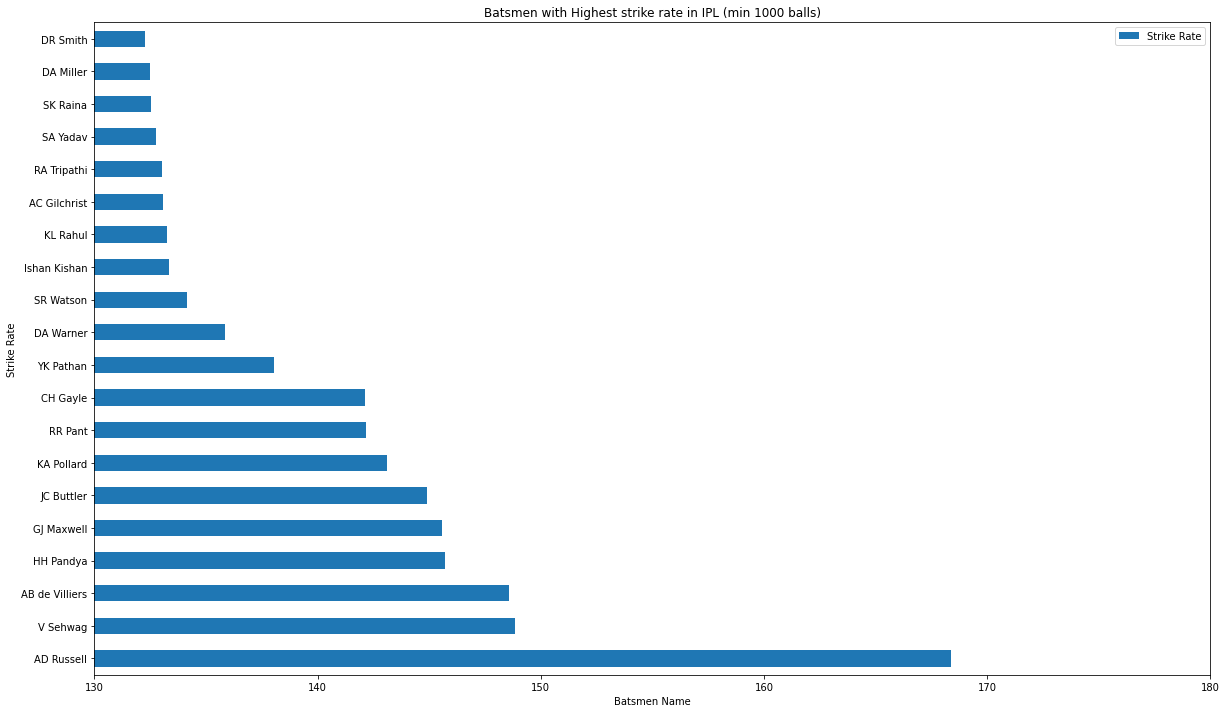

In [ ]:
df_combined_with_strike_rate.sort_values(by = ['Strike Rate'], ascending = False).head(20).plot(x = 'Batsmen', y = 'Strike Rate', kind = 'barh', figsize = (20,12), title = 'Batsmen with Highest strike rate in IPL (min 1000 balls)')
plt.xlabel('Batsmen Name')
plt.ylabel('Strike Rate')
plt.xticks([130,140,150,160,170,180])
plt.xlim(xmin = 130, xmax = 180)
plt.show()

In [ ]:
df_batsmen = df.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False)

In [ ]:
df_batsmen.head()

striker
V Kohli      6293
S Dhawan     5784
RG Sharma    5613
SK Raina     5536
DA Warner    5451
Name: runs_off_bat, dtype: int64

In [ ]:
df_batsmen_with_Innings = pd.DataFrame(df['player_dismissed'].value_counts()).reset_index().rename(columns = {'player_dismissed':'dismissals', 'index':'Batsmen'})

In [ ]:
df_batsmen_with_Innings.head()

,Batsmen,dismissals
0,RG Sharma,180
1,SK Raina,171
2,RV Uthappa,169
3,V Kohli,168
4,S Dhawan,167


In [ ]:
df_combined_with_Average = df_combined_with_strike_rate.merge(df_batsmen_with_Innings, on = 'Batsmen', how = 'left')

In [ ]:
df_combined_with_Average.reset_index(inplace = True)

In [ ]:
df_combined_with_Average.head()

,index,Batsmen,Runs Scored,Balls Faced,Strike Rate,dismissals
0,0,V Kohli,6293,4960,126.875000,168
1,1,S Dhawan,5784,4688,123.378840,167
2,2,RG Sharma,5613,4398,127.626194,180
3,3,SK Raina,5536,4177,132.535312,171
4,4,DA Warner,5451,4012,135.867398,133


In [ ]:
df_combined_with_Average['Average Runs per Innings'] = ((df_combined_with_Average['Runs Scored'])/(df_combined_with_Average['dismissals']))

In [ ]:
df_combined_with_Average.head()

,index,Batsmen,Runs Scored,Balls Faced,Strike Rate,dismissals,Average Runs per Innings
0,0,V Kohli,6293,4960,126.875000,168,37.458333
1,1,S Dhawan,5784,4688,123.378840,167,34.634731
2,2,RG Sharma,5613,4398,127.626194,180,31.183333
3,3,SK Raina,5536,4177,132.535312,171,32.374269
4,4,DA Warner,5451,4012,135.867398,133,40.984962


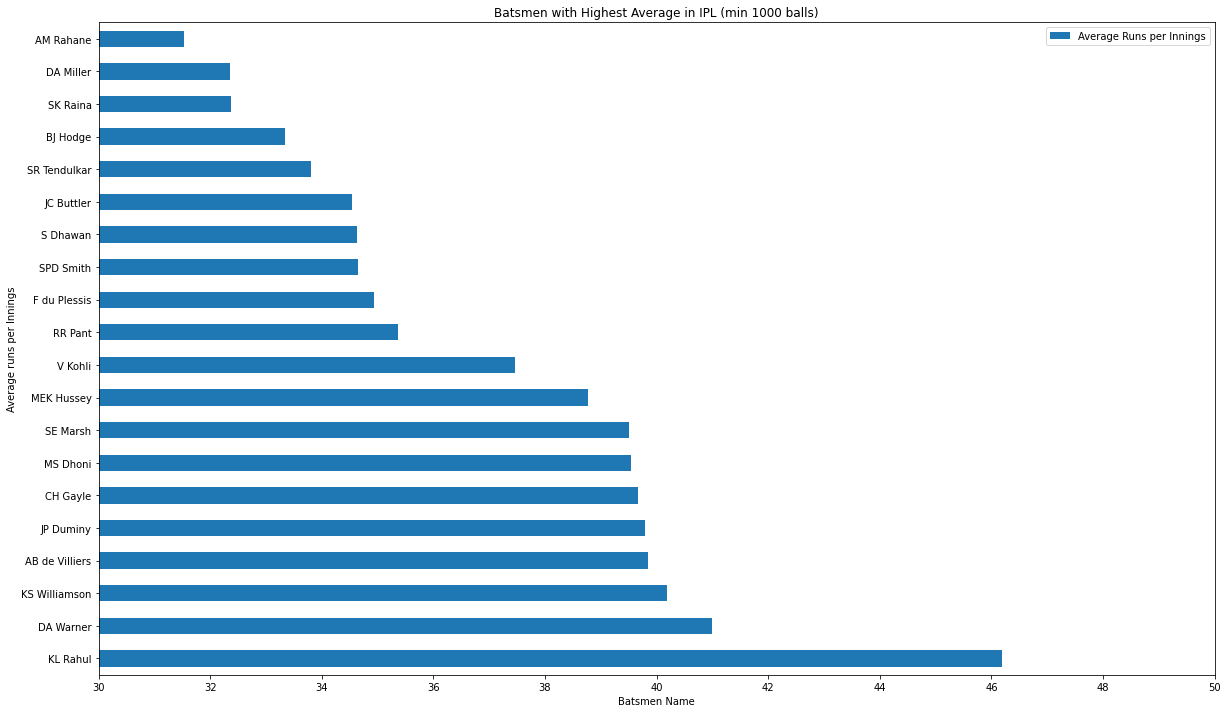

In [ ]:
df_combined_with_Average.sort_values(by = 'Average Runs per Innings', ascending = False).head(20).plot(x = 'Batsmen', y = 'Average Runs per Innings', kind = 'barh', figsize = (20,12), title = 'Batsmen with Highest Average in IPL (min 1000 balls)')
plt.xlabel('Batsmen Name')
plt.ylabel('Average runs per Innings')
plt.xticks([30,32,34,36,38,40,42,44,46,48,50])
plt.xlim(xmin = 30, xmax = 50)
plt.show()

In [ ]:
df_combined_with_Average['Balls per wicket'] = ((df_combined_with_Average['Balls Faced'])/(df_combined_with_Average['dismissals']))

In [ ]:
df_combined_with_Average.head()

,index,Batsmen,Runs Scored,Balls Faced,Strike Rate,dismissals,Average Runs per Innings,Balls per wicket
0,0,V Kohli,6293,4960,126.875000,168,37.458333,29.523810
1,1,S Dhawan,5784,4688,123.378840,167,34.634731,28.071856
2,2,RG Sharma,5613,4398,127.626194,180,31.183333,24.433333
3,3,SK Raina,5536,4177,132.535312,171,32.374269,24.426901
4,4,DA Warner,5451,4012,135.867398,133,40.984962,30.165414


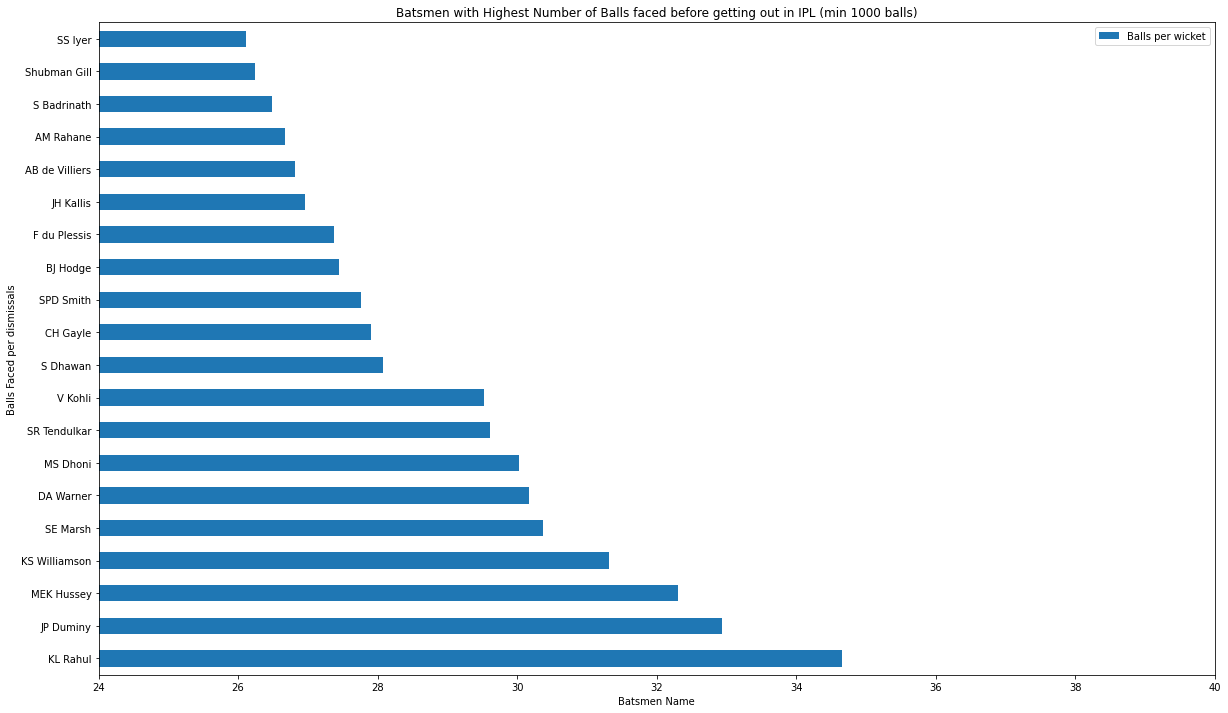

In [ ]:
df_combined_with_Average.sort_values(by = 'Balls per wicket', ascending = False).head(20).plot(x = 'Batsmen', y = 'Balls per wicket', kind = 'barh', figsize = (20,12), title = 'Batsmen with Highest Number of Balls faced before getting out in IPL (min 1000 balls)')
plt.xlabel('Batsmen Name')
plt.ylabel('Balls Faced per dismissals')
plt.xticks([24,26,28,30,32,34,36,38,40])
plt.xlim(xmin = 24, xmax = 40)
plt.show()

In [ ]:
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_boundary_hitters = df.loc[(df.runs_off_bat == 4)]

In [ ]:
df_boundary_hitters.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,18.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,JH Kallis,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,18.6,Kolkata Knight Riders,Royal Challengers Bangalore,Mohammad Hafeez,BB McCullum,JH Kallis,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,9.6,Royal Challengers Bangalore,Kolkata Knight Riders,AA Noffke,P Kumar,SC Ganguly,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,10.5,Royal Challengers Bangalore,Kolkata Knight Riders,P Kumar,AA Noffke,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_boundary_hitter_batsmen = df_boundary_hitters.groupby(['striker'])['runs_off_bat'].count().sort_values(ascending = False).rename('Batsmen')

In [ ]:
df_boundary_hitter_batsmen.head()

striker
S Dhawan     654
V Kohli      549
DA Warner    525
SK Raina     506
G Gambhir    492
Name: Batsmen, dtype: int64

In [ ]:
df_batsmen_new = df_boundary_hitters.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False)

In [ ]:
df_batsmen_new.head(10)

striker
S Dhawan          2616
V Kohli           2196
DA Warner         2100
SK Raina          2024
G Gambhir         1968
RG Sharma         1964
RV Uthappa        1848
AM Rahane         1668
AB de Villiers    1656
CH Gayle          1632
Name: runs_off_bat, dtype: int64

In [ ]:
df_combined_batsmen_new = pd.concat([df_batsmen_new,df_boundary_hitter_batsmen], axis = 1, join = 'inner')

In [ ]:
df_combined_batsmen_new.head()

,runs_off_bat,Batsmen
striker,,
S Dhawan,2616,654
V Kohli,2196,549
DA Warner,2100,525
SK Raina,2024,506
G Gambhir,1968,492


In [ ]:
df_combined_batsmen_new.reset_index(inplace = True)


In [ ]:
df_combined_batsmen_new.head()

,striker,runs_off_bat,Batsmen
0,S Dhawan,2616,654
1,V Kohli,2196,549
2,DA Warner,2100,525
3,SK Raina,2024,506
4,G Gambhir,1968,492


In [ ]:
df_combined_batsmen_new.dtypes

striker         object
runs_off_bat    int64 
Batsmen         int64 
dtype: object

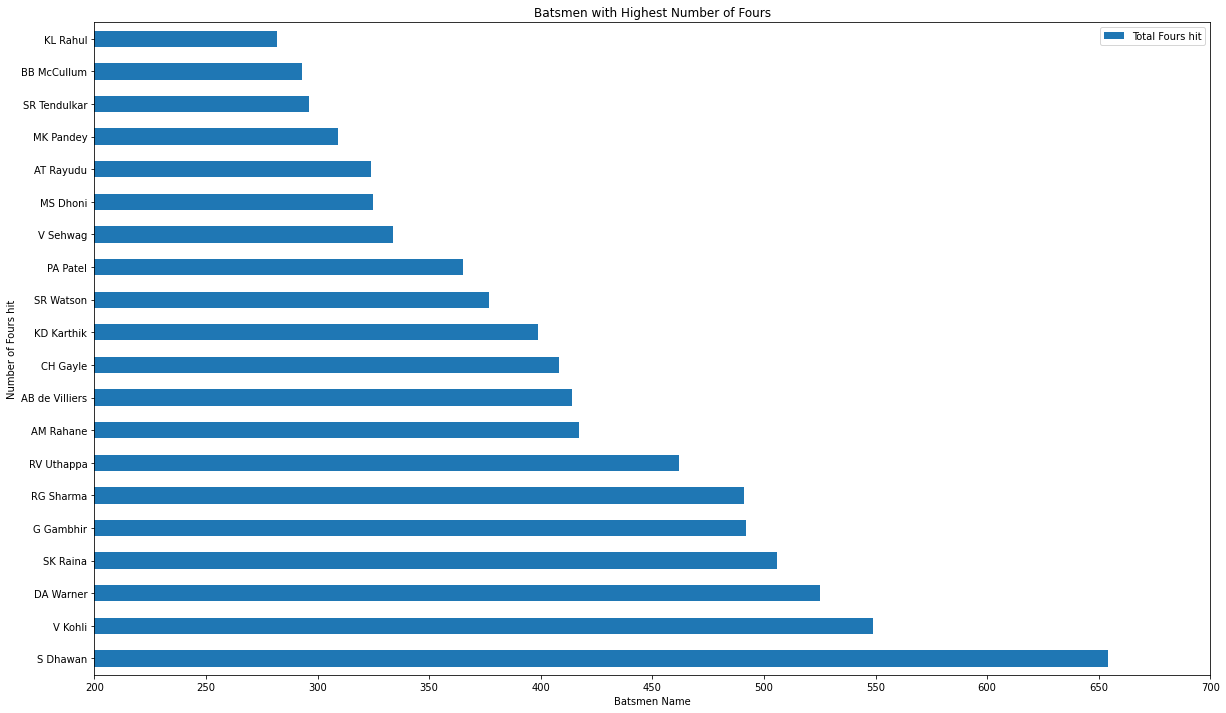

In [ ]:
df_combined_batsmen_new.rename(columns = {'striker':'Batsmen', 'runs_off_bat':'Runs Scored in Boundaries', 'Batsmen' : 'Total Fours hit'}).head(20).sort_values(by = 'Total Fours hit', ascending = False).plot(x = 'Batsmen', y = 'Total Fours hit', kind = 'barh', figsize = (20,12), title = 'Batsmen with Highest Number of Fours')
plt.xlabel('Batsmen Name')
plt.ylabel('Number of Fours hit')
plt.xticks([200,250,300,350,400,450,500,550,600,650,700])
plt.xlim(xmin = 200, xmax = 700)
plt.show()

In [ ]:
df_combined_batsmen_new.head(10)

,striker,runs_off_bat,Batsmen
0,S Dhawan,2616,654
1,V Kohli,2196,549
2,DA Warner,2100,525
3,SK Raina,2024,506
4,G Gambhir,1968,492
5,RG Sharma,1964,491
6,RV Uthappa,1848,462
7,AM Rahane,1668,417
8,AB de Villiers,1656,414
9,CH Gayle,1632,408


In [ ]:
df_combined_batsmen_new.rename(columns = {'striker' : 'Batsmen', 'runs_off_bat' : 'Runs scored by Fours', 'Batsmen' : 'Total Fours hit'}).reset_index(inplace = True)

In [ ]:
df_combined_batsmen_new = df_combined_batsmen_new.drop(['Batsmen'], axis = 1)

In [ ]:
df_combined_batsmen_new = df_combined_batsmen_new.rename(columns = {'striker' : 'Batsmen', 'runs_off_bat' : 'Runs scored by Fours'})

In [ ]:
df_combined_batsmen_new.head()

,Batsmen,Runs scored by Fours
0,S Dhawan,2616
1,V Kohli,2196
2,DA Warner,2100
3,SK Raina,2024
4,G Gambhir,1968


In [ ]:
df_six_hitters = df.loc[(df.runs_off_bat == 6)]

In [ ]:
df_six_hitters.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
11,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,AB Agarkar,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,18.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,JH Kallis,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,19.1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,P Kumar,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,19.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,P Kumar,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,19.6,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,P Kumar,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_six_hitter_batsmen = df_six_hitters.groupby(['striker'])['runs_off_bat'].count().sort_values(ascending = False)

In [ ]:
df_six_hitter_batsmen.head()

striker
CH Gayle          359
AB de Villiers    253
RG Sharma         228
MS Dhoni          219
KA Pollard        215
Name: runs_off_bat, dtype: int64

In [ ]:
df_six_hitter_batsmen_new = df_six_hitters.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False)

In [ ]:
df_six_hitter_batsmen_new.head()

striker
CH Gayle          2154
AB de Villiers    1518
RG Sharma         1368
MS Dhoni          1314
KA Pollard        1290
Name: runs_off_bat, dtype: int64

In [ ]:
df_combined_six_hitting_batsmen_new = pd.concat([df_six_hitter_batsmen_new,df_six_hitter_batsmen], axis = 1, join = 'inner')

In [ ]:
df_combined_six_hitting_batsmen_new.head()

,runs_off_bat,runs_off_bat
striker,,
CH Gayle,2154,359
AB de Villiers,1518,253
RG Sharma,1368,228
MS Dhoni,1314,219
KA Pollard,1290,215


In [ ]:
df_combined_six_hitting_batsmen_new.reset_index(inplace = True)

In [ ]:
df_combined_six_hitting_batsmen_new.head()

,striker,runs_off_bat,runs_off_bat
0,CH Gayle,2154,359
1,AB de Villiers,1518,253
2,RG Sharma,1368,228
3,MS Dhoni,1314,219
4,KA Pollard,1290,215


In [ ]:
df_combined_six_hitting_batsmen_new.columns = ['Batsmen', 'Runs Scored by Sixes', 'Total Sixes Hit']

In [ ]:
df_combined_six_hitting_batsmen_new.head()

,Batsmen,Runs Scored by Sixes,Total Sixes Hit
0,CH Gayle,2154,359
1,AB de Villiers,1518,253
2,RG Sharma,1368,228
3,MS Dhoni,1314,219
4,KA Pollard,1290,215


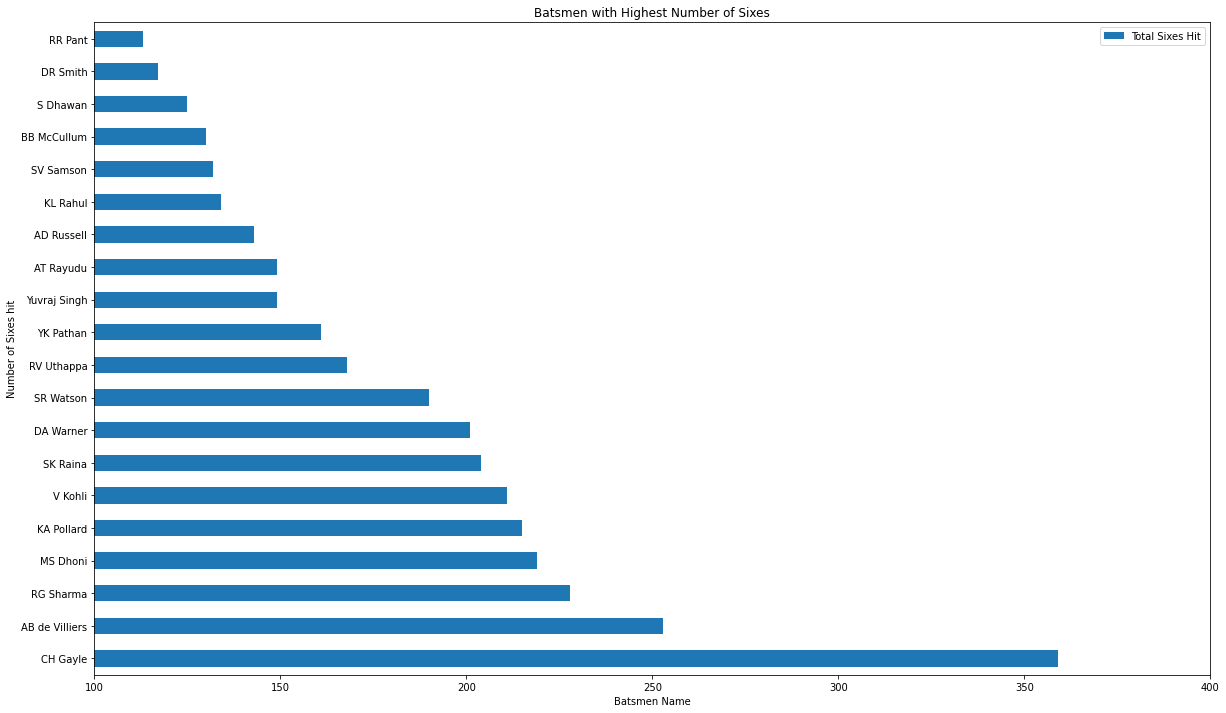

In [ ]:
df_combined_six_hitting_batsmen_new.sort_values(by = 'Total Sixes Hit', ascending = False).head(20).plot(x = 'Batsmen', y = 'Total Sixes Hit', kind = 'barh', figsize = (20,12), title = 'Batsmen with Highest Number of Sixes')
plt.xlabel('Batsmen Name')
plt.ylabel('Number of Sixes hit')
plt.xticks([100,150,200,250,300,350,400])
plt.xlim(xmin = 100, xmax = 400)
plt.show()

In [ ]:
df_combined_with_Average.head()

,index,Batsmen,Runs Scored,Balls Faced,Strike Rate,dismissals,Average Runs per Innings,Balls per wicket
0,0,V Kohli,6293,4960,126.875000,168,37.458333,29.523810
1,1,S Dhawan,5784,4688,123.378840,167,34.634731,28.071856
2,2,RG Sharma,5613,4398,127.626194,180,31.183333,24.433333
3,3,SK Raina,5536,4177,132.535312,171,32.374269,24.426901
4,4,DA Warner,5451,4012,135.867398,133,40.984962,30.165414


In [ ]:
df_combined_with_Average.drop(['index'], axis = 1)

,Batsmen,Runs Scored,Balls Faced,Strike Rate,dismissals,Average Runs per Innings,Balls per wicket
0,V Kohli,6293,4960,126.875000,168,37.458333,29.523810
1,S Dhawan,5784,4688,123.378840,167,34.634731,28.071856
2,RG Sharma,5613,4398,127.626194,180,31.183333,24.433333
3,SK Raina,5536,4177,132.535312,171,32.374269,24.426901
4,DA Warner,5451,4012,135.867398,133,40.984962,30.165414
5,AB de Villiers,5181,3487,148.580442,130,39.853846,26.823077
6,CH Gayle,4997,3516,142.121729,126,39.658730,27.904762
7,MS Dhoni,4746,3604,131.687014,120,39.550000,30.033333
8,RV Uthappa,4724,3746,126.107848,169,27.952663,22.165680
9,G Gambhir,4217,3524,119.665153,136,31.007353,25.911765


In [ ]:
df_combined_with_Average_new = df_combined_with_Average.merge(df_combined_six_hitting_batsmen_new, on = 'Batsmen', how = 'left')

In [ ]:
df_combined_with_Average_new.drop(['index'], axis = 1)

,Batsmen,Runs Scored,Balls Faced,Strike Rate,dismissals,Average Runs per Innings,Balls per wicket,Runs Scored by Sixes,Total Sixes Hit
0,V Kohli,6293,4960,126.875000,168,37.458333,29.523810,1266,211
1,S Dhawan,5784,4688,123.378840,167,34.634731,28.071856,750,125
2,RG Sharma,5613,4398,127.626194,180,31.183333,24.433333,1368,228
3,SK Raina,5536,4177,132.535312,171,32.374269,24.426901,1224,204
4,DA Warner,5451,4012,135.867398,133,40.984962,30.165414,1206,201
5,AB de Villiers,5181,3487,148.580442,130,39.853846,26.823077,1518,253
6,CH Gayle,4997,3516,142.121729,126,39.658730,27.904762,2154,359
7,MS Dhoni,4746,3604,131.687014,120,39.550000,30.033333,1314,219
8,RV Uthappa,4724,3746,126.107848,169,27.952663,22.165680,1008,168
9,G Gambhir,4217,3524,119.665153,136,31.007353,25.911765,354,59


In [ ]:
df_combined_with_Average_new = df_combined_with_Average_new.drop(['index'], axis = 1)

In [ ]:
df_combined_with_Average_new.head()

,Batsmen,Runs Scored,Balls Faced,Strike Rate,dismissals,Average Runs per Innings,Balls per wicket,Runs Scored by Sixes,Total Sixes Hit
0,V Kohli,6293,4960,126.875000,168,37.458333,29.523810,1266,211
1,S Dhawan,5784,4688,123.378840,167,34.634731,28.071856,750,125
2,RG Sharma,5613,4398,127.626194,180,31.183333,24.433333,1368,228
3,SK Raina,5536,4177,132.535312,171,32.374269,24.426901,1224,204
4,DA Warner,5451,4012,135.867398,133,40.984962,30.165414,1206,201


In [ ]:
df_combined_with_Average_new1 = df_combined_with_Average_new.merge(df_combined_batsmen_new, on = 'Batsmen', how = 'left')

In [ ]:
df_combined_with_Average_new1.head()

,Batsmen,Runs Scored,Balls Faced,Strike Rate,dismissals,Average Runs per Innings,Balls per wicket,Runs Scored by Sixes,Total Sixes Hit,Runs scored by Fours
0,V Kohli,6293,4960,126.875000,168,37.458333,29.523810,1266,211,2196
1,S Dhawan,5784,4688,123.378840,167,34.634731,28.071856,750,125,2616
2,RG Sharma,5613,4398,127.626194,180,31.183333,24.433333,1368,228,1964
3,SK Raina,5536,4177,132.535312,171,32.374269,24.426901,1224,204,2024
4,DA Warner,5451,4012,135.867398,133,40.984962,30.165414,1206,201,2100


In [ ]:
df_combined_with_Average_new1['Balls per Six'] = ((df_combined_with_Average_new1['Balls Faced'])/(df_combined_with_Average_new1['Total Sixes Hit']))

In [ ]:
df_combined_with_Average_new1['Total Fours Hit'] = df_combined_with_Average_new1['Runs scored by Fours']/4

In [ ]:
df_combined_with_Average_new1.head()

,Batsmen,Runs Scored,Balls Faced,Strike Rate,dismissals,Average Runs per Innings,Balls per wicket,Runs Scored by Sixes,Total Sixes Hit,Runs scored by Fours,Balls per Six,Total Fours Hit
0,V Kohli,6293,4960,126.875000,168,37.458333,29.523810,1266,211,2196,23.507109,549.0
1,S Dhawan,5784,4688,123.378840,167,34.634731,28.071856,750,125,2616,37.504000,654.0
2,RG Sharma,5613,4398,127.626194,180,31.183333,24.433333,1368,228,1964,19.289474,491.0
3,SK Raina,5536,4177,132.535312,171,32.374269,24.426901,1224,204,2024,20.475490,506.0
4,DA Warner,5451,4012,135.867398,133,40.984962,30.165414,1206,201,2100,19.960199,525.0


In [ ]:
df_combined_with_Average_new1['Balls per Four'] = ((df_combined_with_Average_new1['Balls Faced'])/(df_combined_with_Average_new1['Total Fours Hit']))

In [ ]:
df_combined_with_Average_new1.head()

,Batsmen,Runs Scored,Balls Faced,Strike Rate,dismissals,Average Runs per Innings,Balls per wicket,Runs Scored by Sixes,Total Sixes Hit,Runs scored by Fours,Balls per Six,Total Fours Hit,Balls per Four
0,V Kohli,6293,4960,126.875000,168,37.458333,29.523810,1266,211,2196,23.507109,549.0,9.034608
1,S Dhawan,5784,4688,123.378840,167,34.634731,28.071856,750,125,2616,37.504000,654.0,7.168196
2,RG Sharma,5613,4398,127.626194,180,31.183333,24.433333,1368,228,1964,19.289474,491.0,8.957230
3,SK Raina,5536,4177,132.535312,171,32.374269,24.426901,1224,204,2024,20.475490,506.0,8.254941
4,DA Warner,5451,4012,135.867398,133,40.984962,30.165414,1206,201,2100,19.960199,525.0,7.641905


In [ ]:
df_combined_with_Average_new1['Percentage of Runs Scored in Boundaries'] = 100*((df_combined_with_Average_new1['Runs scored by Fours'])+(df_combined_with_Average_new1['Runs Scored by Sixes']))/(df_combined_with_Average_new1['Runs Scored'])

In [ ]:
df_combined_with_Average_new1.head()

,Batsmen,Runs Scored,Balls Faced,Strike Rate,dismissals,Average Runs per Innings,Balls per wicket,Runs Scored by Sixes,Total Sixes Hit,Runs scored by Fours,Balls per Six,Total Fours Hit,Balls per Four,Percentage of Runs Scored in Boundaries
0,V Kohli,6293,4960,126.875000,168,37.458333,29.523810,1266,211,2196,23.507109,549.0,9.034608,55.013507
1,S Dhawan,5784,4688,123.378840,167,34.634731,28.071856,750,125,2616,37.504000,654.0,7.168196,58.195021
2,RG Sharma,5613,4398,127.626194,180,31.183333,24.433333,1368,228,1964,19.289474,491.0,8.957230,59.362195
3,SK Raina,5536,4177,132.535312,171,32.374269,24.426901,1224,204,2024,20.475490,506.0,8.254941,58.670520
4,DA Warner,5451,4012,135.867398,133,40.984962,30.165414,1206,201,2100,19.960199,525.0,7.641905,60.649422


In [ ]:
df_final_batsmen_dataset = df_combined_with_Average_new1

In [ ]:
df_final_batsmen_dataset.head()

,Batsmen,Runs Scored,Balls Faced,Strike Rate,dismissals,Average Runs per Innings,Balls per wicket,Runs Scored by Sixes,Total Sixes Hit,Runs scored by Fours,Balls per Six,Total Fours Hit,Balls per Four,Percentage of Runs Scored in Boundaries
0,V Kohli,6293,4960,126.875000,168,37.458333,29.523810,1266,211,2196,23.507109,549.0,9.034608,55.013507
1,S Dhawan,5784,4688,123.378840,167,34.634731,28.071856,750,125,2616,37.504000,654.0,7.168196,58.195021
2,RG Sharma,5613,4398,127.626194,180,31.183333,24.433333,1368,228,1964,19.289474,491.0,8.957230,59.362195
3,SK Raina,5536,4177,132.535312,171,32.374269,24.426901,1224,204,2024,20.475490,506.0,8.254941,58.670520
4,DA Warner,5451,4012,135.867398,133,40.984962,30.165414,1206,201,2100,19.960199,525.0,7.641905,60.649422


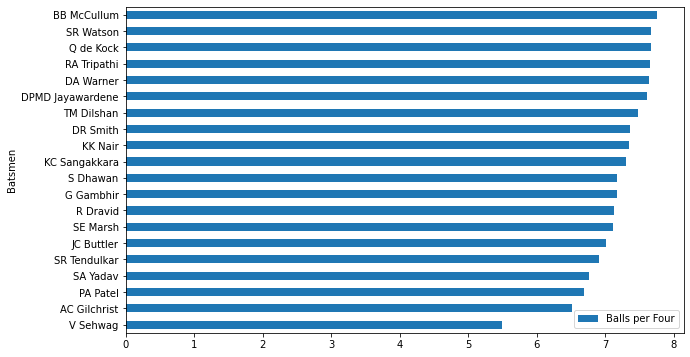

In [ ]:
df_final_batsmen_dataset.sort_values(by = 'Balls per Four', ascending = True).head(20).plot(x = 'Batsmen', y = 'Balls per Four', kind = 'barh', figsize = (10,6))
plt.xlabel = 'Balls per Four'
plt.ylabel = 'Batsmen Name'
plt.show()

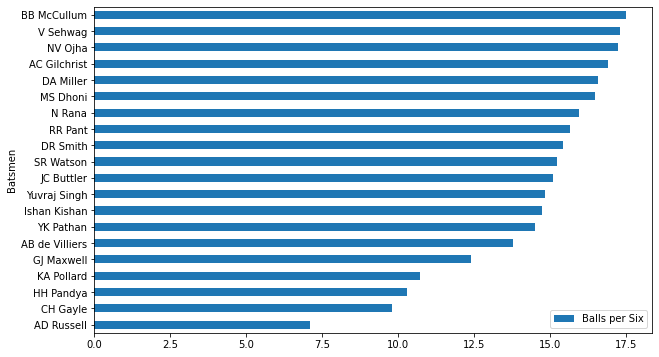

In [ ]:
df_final_batsmen_dataset.sort_values(by = 'Balls per Six', ascending = True).head(20).plot(x = 'Batsmen', y = 'Balls per Six', kind = 'barh', figsize = (10,6))
plt.xlabel = 'Balls per Six'
plt.ylabel = 'Batsmen Name'
plt.show()

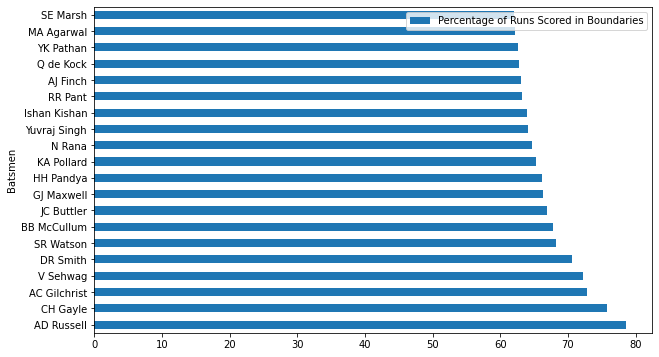

In [ ]:
df_final_batsmen_dataset.sort_values(by = 'Percentage of Runs Scored in Boundaries', ascending = False).head(20).plot(x = 'Batsmen', y = 'Percentage of Runs Scored in Boundaries', kind = 'barh', figsize = (10,6))
plt.xlabel = 'Percentage of Runs Scored in Boundaries'
plt.ylabel = 'Batsmen Name'
plt.show()

In [ ]:
df.head(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.5,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.6,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.1,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_death_overs_specialist = df.loc[df['ball'] >= 16]

In [ ]:
df_death_overs_specialist.tail(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
207998,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,18.5,Chennai Super Kings,Kolkata Knight Riders,MM Ali,F du Plessis,CV Varun,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207999,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,18.6,Chennai Super Kings,Kolkata Knight Riders,MM Ali,F du Plessis,CV Varun,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208000,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,19.1,Chennai Super Kings,Kolkata Knight Riders,MM Ali,F du Plessis,Shivam Mavi,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208001,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,19.2,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,Shivam Mavi,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208002,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,19.3,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,Shivam Mavi,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208003,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,19.4,Chennai Super Kings,Kolkata Knight Riders,MM Ali,F du Plessis,Shivam Mavi,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208004,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,19.5,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,Shivam Mavi,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208005,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,19.6,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,Shivam Mavi,0,0,NaN,NaN,NaN,NaN,NaN,caught,F du Plessis,NaN,NaN
208007,1254117,2021,2021-10-15,Dubai International Cricket Stadium,1,17.7,Chennai Super Kings,Kolkata Knight Riders,F du Plessis,MM Ali,LH Ferguson,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
208040,1254117,2021,2021-10-15,Dubai International Cricket Stadium,2,19.6,Kolkata Knight Riders,Chennai Super Kings,LH Ferguson,CV Varun,DJ Bravo,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_death_overs_specialist_batsmen = df_death_overs_specialist.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False)

In [ ]:
df_death_overs_specialist_batsmen.head()

striker
MS Dhoni          2377
KA Pollard        1618
AB de Villiers    1421
RG Sharma         1145
RA Jadeja         1066
Name: runs_off_bat, dtype: int64

In [ ]:
df_death_overs_specialist_batsmen1 = df_death_overs_specialist.groupby(['striker'])['ball'].count().sort_values(ascending = False)

In [ ]:
df_death_overs_specialist_batsmen1.head(20)

striker
MS Dhoni           1326
KA Pollard         925 
RA Jadeja          710 
AB de Villiers     635 
KD Karthik         605 
RG Sharma          605 
YK Pathan          537 
HH Pandya          517 
V Kohli            492 
AT Rayudu          485 
DJ Bravo           435 
SK Raina           405 
JP Duminy          402 
Harbhajan Singh    390 
AD Russell         381 
IK Pathan          380 
JA Morkel          368 
Yuvraj Singh       364 
DA Miller          347 
MK Pandey          339 
Name: ball, dtype: int64

In [ ]:
df_death_overs_strike_rate = pd.concat([df_death_overs_specialist_batsmen,df_death_overs_specialist_batsmen1], axis = 1, join = 'inner')

In [ ]:
df_death_overs_strike_rate.reset_index(inplace = True)

In [ ]:
df_death_overs_strike_rate = df_death_overs_strike_rate.set_axis(['Batsmen', 'Runs Scored in Death Overs', 'Balls faced in Death Overs'], axis = 1, inplace = False)

In [ ]:
df_death_overs_strike_rate.head()

,Batsmen,Runs Scored in Death Overs,Balls faced in Death Overs
0,MS Dhoni,2377,1326
1,KA Pollard,1618,925
2,AB de Villiers,1421,635
3,RG Sharma,1145,605
4,RA Jadeja,1066,710


In [ ]:
df_death_overs_specialist_batsmen11 = df_death_overs_strike_rate.loc[df_death_overs_strike_rate['Balls faced in Death Overs'] >= 100]

In [ ]:
df_death_overs_specialist_batsmen11.tail()

,Batsmen,Runs Scored in Death Overs,Balls faced in Death Overs
104,Y Nagar,149,109
105,R Sathish,143,103
110,C de Grandhomme,136,103
123,SK Warne,116,116
130,UT Yadav,110,113


In [ ]:
df_death_overs_specialist_batsmen_2 = df_death_overs_specialist.loc[(df_death_overs_specialist.runs_off_bat == 4)]

In [ ]:
df_death_overs_specialist_batsmen_2.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
30,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,18.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,JH Kallis,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,18.6,Kolkata Knight Riders,Royal Challengers Bangalore,Mohammad Hafeez,BB McCullum,JH Kallis,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,17.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,AA Noffke,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,335984,2008,2008-04-19,Feroz Shah Kotla,1,19.1,Rajasthan Royals,Delhi Daredevils,D Salunkhe,SK Trivedi,GD McGrath,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,335984,2008,2008-04-19,Feroz Shah Kotla,1,18.4,Rajasthan Royals,Delhi Daredevils,D Salunkhe,SK Trivedi,DL Vettori,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_death_overs_specialist_batsmen_Fours = df_death_overs_specialist_batsmen_2.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False)

In [ ]:
df_death_overs_specialist_batsmen_Fours.head(20)

striker
MS Dhoni           720
KA Pollard         424
AB de Villiers     424
KD Karthik         408
RG Sharma          360
RA Jadeja          320
YK Pathan          304
V Kohli            280
AT Rayudu          252
HH Pandya          244
DJ Bravo           220
SK Raina           216
Harbhajan Singh    212
IK Pathan          208
AD Russell         204
SPD Smith          204
MK Tiwary          200
RR Pant            188
JP Duminy          188
Yuvraj Singh       176
Name: runs_off_bat, dtype: int64

In [ ]:
df_death_overs_specialist_batsmen_3 = df_death_overs_specialist.loc[(df_death_overs_specialist.runs_off_bat == 6)]

In [ ]:
df_death_overs_specialist_batsmen_3.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
29,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,18.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,JH Kallis,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,19.1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,P Kumar,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,19.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,P Kumar,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,19.6,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,P Kumar,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,18.1,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,Mohammad Hafeez,JH Kallis,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_death_overs_specialist_batsmen_Sixes = df_death_overs_specialist_batsmen_3.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False)

In [ ]:
df_death_overs_specialist_batsmen_Sixes.head()

striker
MS Dhoni          864
KA Pollard        720
AB de Villiers    672
RG Sharma         468
HH Pandya         420
Name: runs_off_bat, dtype: int64

In [ ]:
df_super_striker = pd.concat([df_death_overs_specialist_batsmen_Fours,df_death_overs_specialist_batsmen_Sixes], axis = 1, join = 'inner')

In [ ]:
df_super_striker.reset_index(inplace = True)

In [ ]:
df_super_striker.head()

,striker,runs_off_bat,runs_off_bat
0,MS Dhoni,720,864
1,KA Pollard,424,720
2,AB de Villiers,424,672
3,KD Karthik,408,300
4,RG Sharma,360,468


In [ ]:
df_super_striker = df_super_striker.set_axis(['Batsmen', 'Total Runs Scored in Fours', 'Total Runs Scored in Sixes'], axis = 1, inplace = False)

In [ ]:
df_super_striker.head()

,Batsmen,Total Runs Scored in Fours,Total Runs Scored in Sixes
0,MS Dhoni,720,864
1,KA Pollard,424,720
2,AB de Villiers,424,672
3,KD Karthik,408,300
4,RG Sharma,360,468


In [ ]:
df_super_striker['Strike Rate in Death Overs'] = 100*((df_death_overs_specialist_batsmen11['Runs Scored in Death Overs'])/(df_death_overs_specialist_batsmen11['Balls faced in Death Overs']))

In [ ]:
df_super_striker.sort_values(by = 'Strike Rate in Death Overs', ascending = False)

,Batsmen,Total Runs Scored in Fours,Total Runs Scored in Sixes,Strike Rate in Death Overs
2,AB de Villiers,424,672,223.779528
6,YK Pathan,304,228,196.951220
47,Y Venugopal Rao,104,84,195.092025
11,SK Raina,216,180,194.225722
30,KM Jadhav,148,132,193.301435
21,PP Chawla,164,66,193.076923
78,CL White,64,120,190.825688
53,SR Watson,92,102,190.566038
3,KD Karthik,408,300,189.256198
39,GJ Maxwell,116,84,186.934673


In [ ]:
df_combined_with_Average_new1 = df_combined_with_Average_new1.merge(df_super_striker, on = 'Batsmen', how = 'left')

In [ ]:
df_combined_with_Average_new1.sort_values(by = 'Strike Rate in Death Overs', ascending = False)

,Batsmen,Runs Scored,Balls Faced,Strike Rate,dismissals,Average Runs per Innings,Balls per wicket,Runs Scored by Sixes,Total Sixes Hit,Runs scored by Fours,Balls per Six,Total Fours Hit,Balls per Four,Percentage of Runs Scored in Boundaries,Total Runs Scored in Fours,Total Runs Scored in Sixes,Strike Rate in Death Overs
5,AB de Villiers,5181,3487,148.580442,130,39.853846,26.823077,1518,253,1656,13.782609,414.0,8.422705,61.262305,424,672,223.779528
17,YK Pathan,3222,2334,138.046272,110,29.290909,21.218182,966,161,1052,14.496894,263.0,8.874525,62.631906,304,228,196.951220
3,SK Raina,5536,4177,132.535312,171,32.374269,24.426901,1224,204,2024,20.475490,506.0,8.254941,58.670520,216,180,194.225722
65,KM Jadhav,1196,1002,119.361277,54,22.148148,18.555556,240,40,404,25.050000,101.0,9.920792,53.846154,148,132,193.301435
13,SR Watson,3880,2892,134.163209,126,30.793651,22.952381,1140,190,1508,15.221053,377.0,7.671088,68.247423,92,102,190.566038
10,KD Karthik,4047,3198,126.547842,157,25.777070,20.369427,672,112,1596,28.553571,399.0,8.015038,56.041512,408,300,189.256198
40,GJ Maxwell,2019,1387,145.565970,80,25.237500,17.337500,672,112,668,12.383929,167.0,8.305389,66.369490,116,84,186.934673
42,MEK Hussey,1977,1648,119.963592,51,38.764706,32.313725,312,52,792,31.692308,198.0,8.323232,55.842185,68,42,182.456140
53,DJ Bravo,1537,1221,125.880426,67,22.940299,18.223881,390,65,476,18.784615,119.0,10.260504,56.343526,220,276,181.379310
7,MS Dhoni,4746,3604,131.687014,120,39.550000,30.033333,1314,219,1300,16.456621,325.0,11.089231,55.077960,720,864,179.260935


In [ ]:
df_combined_with_Average_new1.columns

Index(['Batsmen', 'Runs Scored', 'Balls Faced', 'Strike Rate', 'dismissals',
       'Average Runs per Innings', 'Balls per wicket', 'Runs Scored by Sixes',
       'Total Sixes Hit', 'Runs scored by Fours', 'Balls per Six',
       'Total Fours Hit', 'Balls per Four',
       'Percentage of Runs Scored in Boundaries', 'Total Runs Scored in Fours',
       'Total Runs Scored in Sixes', 'Strike Rate in Death Overs'],
      dtype='object')

In [ ]:
df_combined_with_Average_new1 = df_combined_with_Average_new1.set_axis(['Batsmen', 'Total Runs Scored in IPL', 'Total Balls Faced in IPL', 'Overall Strike Rate', 'No. of Dismissals', 'Average Runs Scored per Innings', 'Balls Faced per Wicket', 'Total Runs Scored by Sixes', 'Total Sixes Hit', 'Total Runs scored by Fours', 'Balls per Six', 'Total Fours Hit', 'Balls per Four', 'Percentage of Total Runs Scored in Boundaries', 'Death Overs - Total Runs Scored in Fours', 'Death Overs - Total Runs Scored in Sixes', 'Death Overs - Strike Rate'], axis = 1, inplace = False)

In [ ]:
df_combined_with_Average_new1.head()

,Batsmen,Total Runs Scored in IPL,Total Balls Faced in IPL,Overall Strike Rate,No. of Dismissals,Average Runs Scored per Innings,Balls Faced per Wicket,Total Runs Scored by Sixes,Total Sixes Hit,Total Runs scored by Fours,Balls per Six,Total Fours Hit,Balls per Four,Percentage of Total Runs Scored in Boundaries,Death Overs - Total Runs Scored in Fours,Death Overs - Total Runs Scored in Sixes,Death Overs - Strike Rate
0,V Kohli,6293,4960,126.875000,168,37.458333,29.523810,1266,211,2196,23.507109,549.0,9.034608,55.013507,280,378,175.628627
1,S Dhawan,5784,4688,123.378840,167,34.634731,28.071856,750,125,2616,37.504000,654.0,7.168196,58.195021,164,72,148.224852
2,RG Sharma,5613,4398,127.626194,180,31.183333,24.433333,1368,228,1964,19.289474,491.0,8.957230,59.362195,360,468,150.140845
3,SK Raina,5536,4177,132.535312,171,32.374269,24.426901,1224,204,2024,20.475490,506.0,8.254941,58.670520,216,180,194.225722
4,DA Warner,5451,4012,135.867398,133,40.984962,30.165414,1206,201,2100,19.960199,525.0,7.641905,60.649422,132,120,166.101695


In [ ]:
df_final_batsmen_dataset = df_combined_with_Average_new1

In [ ]:
df_final_batsmen_dataset.head()

,Batsmen,Total Runs Scored in IPL,Total Balls Faced in IPL,Overall Strike Rate,No. of Dismissals,Average Runs Scored per Innings,Balls Faced per Wicket,Total Runs Scored by Sixes,Total Sixes Hit,Total Runs scored by Fours,Balls per Six,Total Fours Hit,Balls per Four,Percentage of Total Runs Scored in Boundaries,Death Overs - Total Runs Scored in Fours,Death Overs - Total Runs Scored in Sixes,Death Overs - Strike Rate
0,V Kohli,6293,4960,126.875000,168,37.458333,29.523810,1266,211,2196,23.507109,549.0,9.034608,55.013507,280,378,175.628627
1,S Dhawan,5784,4688,123.378840,167,34.634731,28.071856,750,125,2616,37.504000,654.0,7.168196,58.195021,164,72,148.224852
2,RG Sharma,5613,4398,127.626194,180,31.183333,24.433333,1368,228,1964,19.289474,491.0,8.957230,59.362195,360,468,150.140845
3,SK Raina,5536,4177,132.535312,171,32.374269,24.426901,1224,204,2024,20.475490,506.0,8.254941,58.670520,216,180,194.225722
4,DA Warner,5451,4012,135.867398,133,40.984962,30.165414,1206,201,2100,19.960199,525.0,7.641905,60.649422,132,120,166.101695


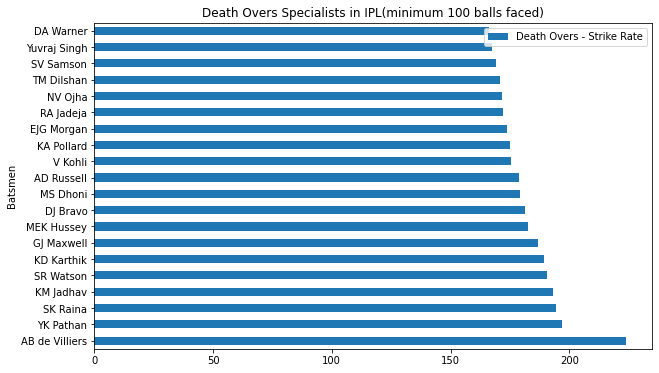

In [ ]:
df_final_batsmen_dataset.sort_values(by = 'Death Overs - Strike Rate', ascending = False).head(20).plot(x = 'Batsmen', y = 'Death Overs - Strike Rate', kind = 'barh', figsize = (10,6), title = 'Death Overs Specialists in IPL(minimum 100 balls faced)')
plt.xlabel = 'Strike Rate in Death Overs'
plt.ylabel = 'Batsmen Name'
plt.show()

In [ ]:
# To form the All Time Best IPL XI , we need the following : 
# Three Batsmen with very good strike rate
# One Batsmen with very good average (these three will be our TOP 3, One of them can be a wicket keeper)
# Three Batsmen which are good power hitters (One of them can be a wicket keeper, one of them can be an All rounder)
# Two Strike Bowlers
# Two spinners

In [ ]:
# Three Batsmen with very good strike rate can be chosen from the below 5 Batsmen
# 1. Andre Russel
# 2. AB De Villiers
# 3. Hardik Pandya
# 4. Glen Maxwell
# 5. Jos Butler

In [ ]:
# One Batsmen with very good average & highest number of balls per wicket can be chosen from the below 5 Batsmen
# 1. KL Rahul
# 2. David Warner
# 3. Kane Williamson
# 4. AB De Villiers
# 5. MS Dhoni

In [ ]:
# Three Batsmen which are good power hitters can be chosen from the below 7 Batsmen
# 1. Chris Gayle
# 2. Ab De Villiers
# 3. Rohit Sharma
# 4. MS Dhoni
# 5. Kieron Pollard
# 6. Virat Kohli
# 7. Suresh Raina

In [ ]:
# Team so far

# 01. KL Rahul (Perfect Anchor = Highest Average + Highest Balls per wicket)
# 02. Shikhar Dhawan (Boundary Hitter 1 = Highest number of Fours)
# 03. Virat Kohli (Boundary Hitter 2 = 2nd Highest with number of fours, 2nd highest with total number of runs in boundaries)
# 04. Jos Butler (Wicket keeper = TOP 5 among highest strike rate in IPL, Almost 70% runs in Boundaries)
# 05. AB De Villier (Death Over Specialist 1 = Highest strike rate in Death Overs)
# 06. Andre Russel (Death Over Specialist 2 = Least number of balls per six, Highest strike rate in the History of IPL)
# 07. Hardik Pandya (Death Over Specialist 3 = 3rd Highest in terms of Least balls per six, 4th highest in terms of strike rate)
# 08. Spinner 1
# 09. Spinner 2
# 10. Fast Bowler / Medium Pacer 1
# 11. Fast Bowler / Medium Pacer 2

In [ ]:
df['wicket_type'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'stumped',
       'retired hurt', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

In [ ]:
df_bowlers = df[df['wicket_type'].str.contains('run out') == False]

In [ ]:
df_bowlers['wicket_type'].unique()

array(['caught', 'bowled', 'lbw', 'stumped', 'retired hurt',
       'caught and bowled', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [ ]:
df_bowlers = df[df['wicket_type'].str.contains('nan') == False]

In [ ]:
df_bowlers['wicket_type'].unique()

array(['caught', 'bowled', 'run out', 'lbw', 'stumped', 'retired hurt',
       'caught and bowled', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [ ]:
df_bowlers = df[df['wicket_type'].str.contains('run out|obstructing the field|retired hurt') == False]

In [ ]:
df_bowlers['wicket_type'].unique()

array(['caught', 'bowled', 'lbw', 'stumped', 'caught and bowled',
       'hit wicket'], dtype=object)

In [ ]:
df_bowlers_wickets = df_bowlers.groupby(['bowler'])['wicket_type'].count()

In [ ]:
df_bowlers_wickets.head()

bowler
A Ashish Reddy    18
A Chandila        11
A Choudhary       5 
A Flintoff        2 
A Kumble          45
Name: wicket_type, dtype: int64

In [ ]:
df_bowlers_wickets.unique()

array([ 18,  11,   5,   2,  45, 166,   7, 106,   1,  34,  28,  20,  21,
         8,  29,  69,  14,  19,  27,  72,   9,  40,   3,  12,  95,   6,
        24,  30, 142,  10,  25,  17,  22,  96,  13,  36,  16,   4,  37,
       167,  59,  26,  86,  38,  97,  23,  42,  78, 150,  80,  82,  85,
        46,  65, 133,  35,  61,  79,  51,  32,  33,  76,  15,  31,  77,
        64,  62,  71,  74,  92,  50,  48,  39,  90, 157,  89, 145, 105,
       127,  43,  93,  58,  47,  57, 170,  67, 143, 112,  63, 119, 139,
       102])

In [ ]:
df_bowlers_balls = df.groupby(['bowler'])['ball'].count()

In [ ]:
df_bowlers_balls.head()

bowler
A Ashish Reddy    270
A Chandila        234
A Choudhary       108
A Dananjaya       25 
A Flintoff        66 
Name: ball, dtype: int64

In [ ]:
df_bowler_runs = df.groupby(['bowler'])['runs_off_bat'].sum()

In [ ]:
df_bowler_runs.head()

bowler
A Ashish Reddy    386
A Chandila        242
A Choudhary       137
A Dananjaya       46 
A Flintoff        105
Name: runs_off_bat, dtype: int64

In [ ]:
df_bowler_runs1 = df.groupby(['bowler'])['extras'].sum()

In [ ]:
df_bowler_runs1.head()

bowler
A Ashish Reddy    14
A Chandila        3 
A Choudhary       7 
A Dananjaya       1 
A Flintoff        1 
Name: extras, dtype: int64

In [ ]:
df_bowlers_details = pd.concat([df_bowlers_wickets,df_bowlers_balls,df_bowler_runs,df_bowler_runs1], axis = 1, join = 'inner')

In [ ]:
df_bowlers_details.reset_index(inplace = True)

In [ ]:
df_bowlers_details = df_bowlers_details.set_axis(['Bowler', 'Total Wickets taken', 'Total Balls Bowled', 'Total Runs Given', 'Total Extras Given'], axis = 1, inplace = False)

In [ ]:
df_bowlers_details.head()

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given
0,A Ashish Reddy,18,270,386,14
1,A Chandila,11,234,242,3
2,A Choudhary,5,108,137,7
3,A Flintoff,2,66,105,1
4,A Kumble,45,983,1027,62


In [ ]:
df_bowlers_details['Total Runs Given'] = (df_bowlers_details['Total Runs Given'] + df_bowlers_details['Total Extras Given'])

In [ ]:
df_bowlers_details.head(20)

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given
0,A Ashish Reddy,18,270,400,14
1,A Chandila,11,234,245,3
2,A Choudhary,5,108,144,7
3,A Flintoff,2,66,106,1
4,A Kumble,45,983,1089,62
5,A Mishra,166,3317,4022,125
6,A Mithun,7,312,477,29
7,A Nehra,106,1974,2537,115
8,A Nel,1,18,31,0
9,A Nortje,34,563,727,51


In [ ]:
df_bowlers_details['Total Bowling Average'] = df_bowlers_details['Total Runs Given']/df_bowlers_details['Total Wickets taken']

In [ ]:
df_bowlers_details.head(20)

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given,Total Bowling Average
0,A Ashish Reddy,18,270,400,14,22.222222
1,A Chandila,11,234,245,3,22.272727
2,A Choudhary,5,108,144,7,28.800000
3,A Flintoff,2,66,106,1,53.000000
4,A Kumble,45,983,1089,62,24.200000
5,A Mishra,166,3317,4022,125,24.228916
6,A Mithun,7,312,477,29,68.142857
7,A Nehra,106,1974,2537,115,23.933962
8,A Nel,1,18,31,0,31.000000
9,A Nortje,34,563,727,51,21.382353


In [ ]:
df_bowlers_details['Total Bowling Strike Rate'] = df_bowlers_details['Total Balls Bowled']/df_bowlers_details['Total Wickets taken']

In [ ]:
df_bowlers_details.head(20)

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given,Total Bowling Average,Total Bowling Strike Rate
0,A Ashish Reddy,18,270,400,14,22.222222,15.000000
1,A Chandila,11,234,245,3,22.272727,21.272727
2,A Choudhary,5,108,144,7,28.800000,21.600000
3,A Flintoff,2,66,106,1,53.000000,33.000000
4,A Kumble,45,983,1089,62,24.200000,21.844444
5,A Mishra,166,3317,4022,125,24.228916,19.981928
6,A Mithun,7,312,477,29,68.142857,44.571429
7,A Nehra,106,1974,2537,115,23.933962,18.622642
8,A Nel,1,18,31,0,31.000000,18.000000
9,A Nortje,34,563,727,51,21.382353,16.558824


In [ ]:
df_bowlers_details = df_bowlers_details.loc[df_bowlers_details['Total Balls Bowled'] > 599]

In [ ]:
df_bowlers_details.sort_values(by = 'Total Balls Bowled', ascending = False)

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given,Total Bowling Average,Total Bowling Strike Rate
254,R Ashwin,145,3605,4090,188,28.206897,24.862069
120,Harbhajan Singh,150,3496,4101,173,27.340000,23.306667
5,A Mishra,166,3317,4022,125,24.228916,19.981928
249,PP Chawla,157,3309,4368,134,27.821656,21.076433
319,SP Narine,143,3174,3588,138,25.090909,22.195804
86,DJ Bravo,167,3067,4133,231,24.748503,18.365269
266,RA Jadeja,127,3059,3862,114,30.409449,24.086614
50,B Kumar,142,3054,3670,210,25.845070,21.507042
312,SL Malinga,170,2974,3486,292,20.505882,17.494118
353,UT Yadav,119,2648,3687,226,30.983193,22.252101


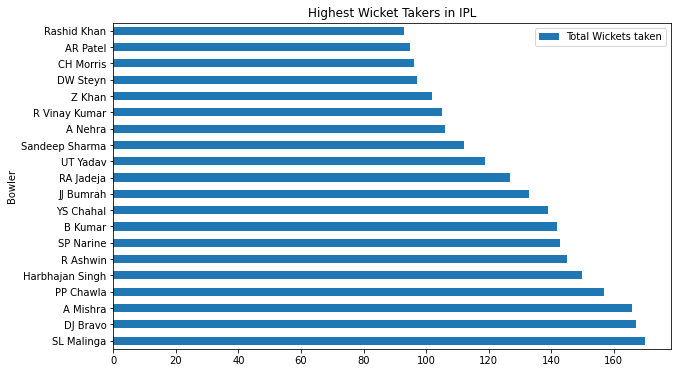

In [ ]:
df_bowlers_details.sort_values(by = 'Total Wickets taken', ascending = False).head(20).plot(x = 'Bowler', y = 'Total Wickets taken', kind = 'barh', figsize = (10,6), title = "Highest Wicket Takers in IPL")
plt.show()

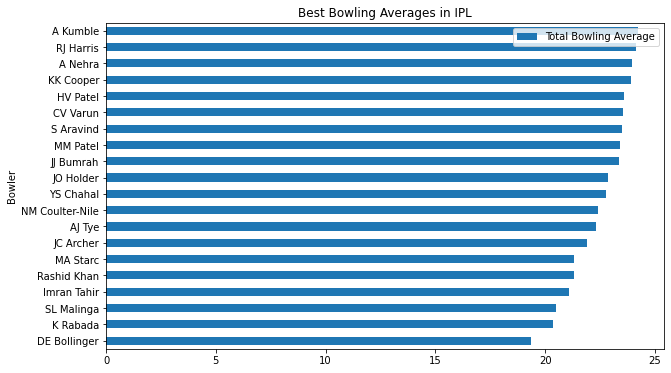

In [ ]:
df_bowlers_details.sort_values(by = 'Total Bowling Average').head(20).plot(x = 'Bowler', y = 'Total Bowling Average', kind = 'barh', figsize = (10,6), title = "Best Bowling Averages in IPL")
plt.show()

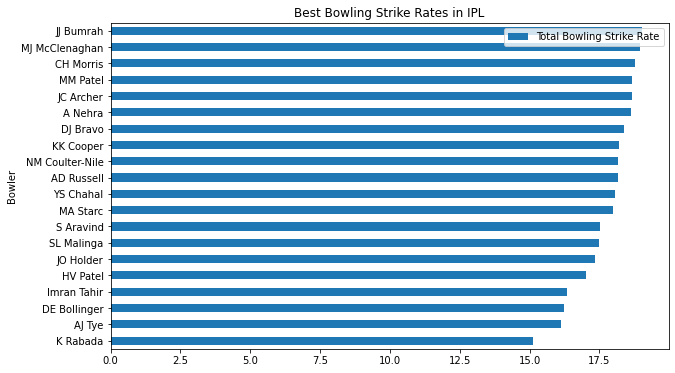

In [ ]:
df_bowlers_details.sort_values(by = 'Total Bowling Strike Rate').head(20).plot(x = 'Bowler', y = 'Total Bowling Strike Rate', kind = 'barh', figsize = (10,6), title = "Best Bowling Strike Rates in IPL")
plt.show()

In [ ]:
df_bowlers['bowler'].unique()

array(['AB Agarkar', 'AB Dinda', 'I Sharma', 'SC Ganguly', 'LR Shukla',
       'Z Khan', 'AA Noffke', 'JH Kallis', 'R Bhatia', 'MF Maharoof',
       'DL Vettori', 'GD McGrath', 'SR Watson', 'M Muralitharan',
       'WA Mota', 'IK Pathan', 'B Lee', 'JR Hopes', 'P Amarnath',
       'Joginder Sharma', 'MS Gony', 'Mohammad Hafeez', 'DJ Hussey',
       'M Kartik', 'PP Ojha', 'WPUJC Vaas', 'RP Singh', 'B Akhil',
       'P Kumar', 'A Nehra', 'ST Jayasuriya', 'Harbhajan Singh',
       'DS Kulkarni', 'S Sreesanth', 'SK Warne', 'D Salunkhe', 'MM Patel',
       'SK Trivedi', 'VY Mahesh', 'Mohammad Asif', 'MA Khote',
       'D Kalyankrishna', 'Shahid Afridi', 'YK Pathan', 'PP Chawla',
       'VRV Singh', 'SM Pollock', 'JDP Oram', 'SB Joshi', 'Yuvraj Singh',
       'Shoaib Malik', 'DNT Zoysa', 'SB Bangar', 'JA Morkel', 'DJ Bravo',
       'CRD Fernando', 'DW Steyn', 'Umar Gul', 'Sohail Tanvir',
       'Gagandeep Singh', 'V Sehwag', 'SB Styris', 'S Vidyut',
       'PJ Sangwan', 'DJ Thornely', 'DP Vij

In [ ]:
df_bowlers_powerplay_overs = df_bowlers.loc[df['ball'] < 6]

In [ ]:
df_bowlers_powerplay_overs['bowler'].unique()

array(['AB Agarkar', 'AB Dinda', 'I Sharma', 'Z Khan', 'GD McGrath',
       'SR Watson', 'B Lee', 'MS Gony', 'WPUJC Vaas', 'RP Singh',
       'DS Kulkarni', 'JR Hopes', 'S Sreesanth', 'MM Patel',
       'Mohammad Asif', 'A Nehra', 'YK Pathan', 'JDP Oram', 'P Kumar',
       'VRV Singh', 'SB Bangar', 'Shahid Afridi', 'IK Pathan', 'DJ Bravo',
       'SM Pollock', 'Sohail Tanvir', 'VY Mahesh', 'SB Styris',
       'DP Vijaykumar', 'DW Steyn', 'JA Morkel', 'Umar Gul', 'PP Chawla',
       'PJ Sangwan', 'Shoaib Akhtar', 'A Mishra', 'M Ntini',
       'Y Venugopal Rao', 'CRD Fernando', 'A Nel', 'AD Mascarenhas',
       'T Thushara', 'SL Malinga', 'Harmeet Singh', 'VS Malik',
       'FH Edwards', 'Kamran Khan', 'Anureet Singh', 'L Balaji',
       'YA Abdulla', 'DP Nannes', 'Pankaj Singh', 'SK Raina',
       'Harbhajan Singh', 'KP Pietersen', 'A Kumble', 'Shoaib Ahmed',
       'M Kartik', 'S Tyagi', 'SM Harwood', 'D du Preez', 'A Singh',
       'SK Trivedi', 'LA Carseldine', 'JH Kallis', 'RG Sharm

In [ ]:
df_bowlers_powerplay_overs.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
13,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.5,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,AB Agarkar,0,0,NaN,NaN,NaN,NaN,NaN,caught,JH Kallis,NaN,NaN
15,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,5.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,CL White,AB Dinda,0,0,NaN,NaN,NaN,NaN,NaN,caught,W Jaffer,NaN,NaN
28,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.2,Royal Challengers Bangalore,Kolkata Knight Riders,V Kohli,W Jaffer,AB Dinda,0,0,NaN,NaN,NaN,NaN,NaN,bowled,V Kohli,NaN,NaN
46,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,1.1,Royal Challengers Bangalore,Kolkata Knight Riders,R Dravid,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,bowled,R Dravid,NaN,NaN
118,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,5.2,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,Z Khan,0,0,NaN,NaN,NaN,NaN,NaN,caught,SC Ganguly,NaN,NaN


In [ ]:
df_bowlers_powerplay_overs_wickets = df_bowlers_powerplay_overs.groupby(['bowler'])['wicket_type'].count()

In [ ]:
df_bowlers_powerplay_overs_wickets.head()

bowler
A Chandila     10
A Choudhary    3 
A Kumble       3 
A Mishra       6 
A Mithun       1 
Name: wicket_type, dtype: int64

In [ ]:
df_bowlers_balls_bowled_in_powerplay = df.loc[df['ball'] < 6]

In [ ]:
df_bowlers_balls_bowled_in_powerplay['bowler'].unique()

array(['AB Dinda', 'I Sharma', 'AB Agarkar', 'P Kumar', 'Z Khan',
       'AA Noffke', 'B Geeves', 'GD McGrath', 'MF Maharoof', 'SR Watson',
       'MM Patel', 'SK Trivedi', 'S Sreesanth', 'B Lee', 'JR Hopes',
       'MS Gony', 'JDP Oram', 'WPUJC Vaas', 'SB Styris', 'RP Singh',
       'JH Kallis', 'A Nehra', 'DS Kulkarni', 'SM Pollock',
       'Mohammad Asif', 'PP Ojha', 'YK Pathan', 'VRV Singh', 'IK Pathan',
       'P Amarnath', 'Sohail Tanvir', 'R Vinay Kumar', 'SB Bangar',
       'DNT Zoysa', 'Shahid Afridi', 'SD Chitnis', 'ST Jayasuriya',
       'DW Steyn', 'DJ Bravo', 'CRD Fernando', 'VY Mahesh', 'Umar Gul',
       'JA Morkel', 'M Ntini', 'PJ Sangwan', 'DP Vijaykumar',
       'Gagandeep Singh', 'SC Ganguly', 'AD Mascarenhas', 'PP Chawla',
       'Shoaib Akhtar', 'PM Sarvesh Kumar', 'V Sehwag', 'A Mishra',
       'Y Venugopal Rao', 'RR Raje', 'VS Yeligati', 'A Kumble',
       'RR Powar', 'A Nel', 'Pankaj Singh', 'BAW Mendis',
       'M Muralitharan', 'Kamran Khan', 'T Thushara', 'A 

In [ ]:
df_bowlers_runs_given_in_powerplay = df.loc[df['ball'] < 6]

In [ ]:
df_bowlers_runs_given_in_powerplay['bowler'].unique()

array(['AB Dinda', 'I Sharma', 'AB Agarkar', 'P Kumar', 'Z Khan',
       'AA Noffke', 'B Geeves', 'GD McGrath', 'MF Maharoof', 'SR Watson',
       'MM Patel', 'SK Trivedi', 'S Sreesanth', 'B Lee', 'JR Hopes',
       'MS Gony', 'JDP Oram', 'WPUJC Vaas', 'SB Styris', 'RP Singh',
       'JH Kallis', 'A Nehra', 'DS Kulkarni', 'SM Pollock',
       'Mohammad Asif', 'PP Ojha', 'YK Pathan', 'VRV Singh', 'IK Pathan',
       'P Amarnath', 'Sohail Tanvir', 'R Vinay Kumar', 'SB Bangar',
       'DNT Zoysa', 'Shahid Afridi', 'SD Chitnis', 'ST Jayasuriya',
       'DW Steyn', 'DJ Bravo', 'CRD Fernando', 'VY Mahesh', 'Umar Gul',
       'JA Morkel', 'M Ntini', 'PJ Sangwan', 'DP Vijaykumar',
       'Gagandeep Singh', 'SC Ganguly', 'AD Mascarenhas', 'PP Chawla',
       'Shoaib Akhtar', 'PM Sarvesh Kumar', 'V Sehwag', 'A Mishra',
       'Y Venugopal Rao', 'RR Raje', 'VS Yeligati', 'A Kumble',
       'RR Powar', 'A Nel', 'Pankaj Singh', 'BAW Mendis',
       'M Muralitharan', 'Kamran Khan', 'T Thushara', 'A 

In [ ]:
df_bowlers_powerplay_overs_wickets_balls_bowled = df_bowlers_balls_bowled_in_powerplay.groupby(['bowler'])['ball'].count()

In [ ]:
df_bowlers_powerplay_overs_wickets_balls_bowled.head()

bowler
A Ashish Reddy    6  
A Chandila        144
A Choudhary       37 
A Dananjaya       6  
A Flintoff        12 
Name: ball, dtype: int64

In [ ]:
df_bowlers_powerplay_overs_wickets_runs_given = df_bowlers_balls_bowled_in_powerplay.groupby(['bowler'])['runs_off_bat'].sum()

In [ ]:
df_bowlers_powerplay_overs_wickets_runs_given.head()

bowler
A Ashish Reddy    20 
A Chandila        137
A Choudhary       45 
A Dananjaya       12 
A Flintoff        21 
Name: runs_off_bat, dtype: int64

In [ ]:
df_bowlers_powerplay_overs_wickets_extra_runs_given = df_bowlers_balls_bowled_in_powerplay.groupby(['bowler'])['extras'].sum()

In [ ]:
df_bowlers_powerplay_overs_wickets_extra_runs_given.head()

bowler
A Ashish Reddy    0
A Chandila        2
A Choudhary       1
A Dananjaya       0
A Flintoff        0
Name: extras, dtype: int64

In [ ]:
df_powerplay_bowlers_details = pd.concat([df_bowlers_powerplay_overs_wickets,df_bowlers_powerplay_overs_wickets_balls_bowled,df_bowlers_powerplay_overs_wickets_runs_given,df_bowlers_powerplay_overs_wickets_extra_runs_given], axis = 1, join = 'inner')

In [ ]:
df_powerplay_bowlers_details.reset_index(inplace = True)

In [ ]:
df_powerplay_bowlers_details.head()

,bowler,wicket_type,ball,runs_off_bat,extras
0,A Chandila,10,144,137,2
1,A Choudhary,3,37,45,1
2,A Kumble,3,109,83,7
3,A Mishra,6,143,167,7
4,A Mithun,1,71,98,7


In [ ]:
print(df_powerplay_bowlers_details.columns)

Index(['bowler', 'wicket_type', 'ball', 'runs_off_bat', 'extras'], dtype='object')


In [ ]:
df_powerplay_bowlers_details.columns = ['Bowler', 'Number of Wickets in Powerplay', 'Balls Bowled in Powerplay', 'Runs Given in Powerplay', 'Extras given in Powerplay']

In [ ]:
df_powerplay_bowlers_details.head()

,Bowler,Number of Wickets in Powerplay,Balls Bowled in Powerplay,Runs Given in Powerplay,Extras given in Powerplay
0,A Chandila,10,144,137,2
1,A Choudhary,3,37,45,1
2,A Kumble,3,109,83,7
3,A Mishra,6,143,167,7
4,A Mithun,1,71,98,7


In [ ]:
print(df_powerplay_bowlers_details.columns)

Index(['Bowler', 'Number of Wickets in Powerplay', 'Balls Bowled in Powerplay',
       'Runs Given in Powerplay', 'Extras given in Powerplay'],
      dtype='object')


In [ ]:
df_bowlers_details = df_bowlers_details.merge(df_powerplay_bowlers_details, on = 'Bowler', how = 'left')

In [ ]:
df_bowlers_details.head()

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given,Total Bowling Average,Total Bowling Strike Rate,Number of Wickets in Powerplay,Balls Bowled in Powerplay,Runs Given in Powerplay,Extras given in Powerplay
0,A Kumble,45,983,1089,62,24.200000,21.844444,3.0,109.0,83.0,7.0
1,A Mishra,166,3317,4022,125,24.228916,19.981928,6.0,143.0,167.0,7.0
2,A Nehra,106,1974,2537,115,23.933962,18.622642,40.0,1131.0,1322.0,65.0
3,AB Agarkar,29,820,1174,62,40.482759,28.275862,6.0,194.0,270.0,25.0
4,AB Dinda,69,1589,2103,116,30.478261,23.028986,33.0,855.0,937.0,73.0


In [ ]:
df_bowlers_details['Bowler'].unique()

array(['A Kumble', 'A Mishra', 'A Nehra', 'AB Agarkar', 'AB Dinda',
       'AD Mathews', 'AD Russell', 'AJ Tye', 'AR Patel', 'B Kumar',
       'B Lee', 'BA Stokes', 'CH Morris', 'CV Varun', 'DE Bollinger',
       'DJ Bravo', 'DL Chahar', 'DL Vettori', 'DP Nannes', 'DS Kulkarni',
       'DT Christian', 'DW Steyn', 'GJ Maxwell', 'HH Pandya', 'HV Patel',
       'Harbhajan Singh', 'I Sharma', 'IK Pathan', 'Imran Tahir',
       'Iqbal Abdulla', 'J Botha', 'JA Morkel', 'JC Archer', 'JD Unadkat',
       'JH Kallis', 'JJ Bumrah', 'JO Holder', 'JP Duminy', 'JP Faulkner',
       'K Rabada', 'KA Pollard', 'KH Pandya', 'KK Cooper', 'KV Sharma',
       'Kuldeep Yadav', 'L Balaji', 'M Ashwin', 'M Kartik', 'M Morkel',
       'M Muralitharan', 'M Prasidh Krishna', 'MA Starc', 'MC Henriques',
       'MG Johnson', 'MJ McClenaghan', 'MM Patel', 'MM Sharma',
       'MP Stoinis', 'MS Gony', 'Mohammed Shami', 'Mohammed Siraj',
       'Mustafizur Rahman', 'NA Saini', 'NLTC Perera', 'NM Coulter-Nile',
       

In [ ]:
df_bowlers_details.sort_values(by = 'Number of Wickets in Powerplay', ascending = False)

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given,Total Bowling Average,Total Bowling Strike Rate,Number of Wickets in Powerplay,Balls Bowled in Powerplay,Runs Given in Powerplay,Extras given in Powerplay
98,Sandeep Sharma,112,2273,2890,116,25.803571,20.294643,53.0,1340.0,1472.0,62.0
109,Z Khan,102,2276,2860,169,28.039216,22.313725,52.0,1346.0,1388.0,104.0
9,B Kumar,142,3054,3670,210,25.845070,21.507042,52.0,1631.0,1506.0,109.0
102,UT Yadav,119,2648,3687,226,30.983193,22.252101,45.0,1131.0,1341.0,98.0
19,DS Kulkarni,86,1876,2513,149,29.220930,21.813953,44.0,1044.0,1236.0,55.0
26,I Sharma,72,2090,2779,197,38.597222,29.027778,44.0,1315.0,1422.0,120.0
73,R Ashwin,145,3605,4090,188,28.206897,24.862069,43.0,1007.0,1026.0,55.0
16,DL Chahar,59,1385,1739,78,29.474576,23.474576,43.0,1064.0,1277.0,58.0
2,A Nehra,106,1974,2537,115,23.933962,18.622642,40.0,1131.0,1322.0,65.0
66,P Kumar,90,2637,3342,236,37.133333,29.300000,40.0,1642.0,1654.0,159.0


In [ ]:
df_bowlers_details['Total Economy Rate'] = ((df_bowlers_details['Total Runs Given'])/(df_bowlers_details['Total Balls Bowled']/6))

In [ ]:
df_bowlers_details.head()

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given,Total Bowling Average,Total Bowling Strike Rate,Number of Wickets in Powerplay,Balls Bowled in Powerplay,Runs Given in Powerplay,Extras given in Powerplay,Total Economy Rate
0,A Kumble,45,983,1089,62,24.200000,21.844444,3.0,109.0,83.0,7.0,6.646999
1,A Mishra,166,3317,4022,125,24.228916,19.981928,6.0,143.0,167.0,7.0,7.275249
2,A Nehra,106,1974,2537,115,23.933962,18.622642,40.0,1131.0,1322.0,65.0,7.711246
3,AB Agarkar,29,820,1174,62,40.482759,28.275862,6.0,194.0,270.0,25.0,8.590244
4,AB Dinda,69,1589,2103,116,30.478261,23.028986,33.0,855.0,937.0,73.0,7.940843


In [ ]:
df_bowlers_details['Economy Rate in Powerplay'] = ((df_bowlers_details['Runs Given in Powerplay'])/(df_bowlers_details['Balls Bowled in Powerplay']/6))

In [ ]:
df_bowlers_details.head()

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given,Total Bowling Average,Total Bowling Strike Rate,Number of Wickets in Powerplay,Balls Bowled in Powerplay,Runs Given in Powerplay,Extras given in Powerplay,Total Economy Rate,Economy Rate in Powerplay
0,A Kumble,45,983,1089,62,24.200000,21.844444,3.0,109.0,83.0,7.0,6.646999,4.568807
1,A Mishra,166,3317,4022,125,24.228916,19.981928,6.0,143.0,167.0,7.0,7.275249,7.006993
2,A Nehra,106,1974,2537,115,23.933962,18.622642,40.0,1131.0,1322.0,65.0,7.711246,7.013263
3,AB Agarkar,29,820,1174,62,40.482759,28.275862,6.0,194.0,270.0,25.0,8.590244,8.350515
4,AB Dinda,69,1589,2103,116,30.478261,23.028986,33.0,855.0,937.0,73.0,7.940843,6.575439


In [ ]:
df_bowlers_details.sort_values(by = 'Total Economy Rate').head(30)

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given,Total Bowling Average,Total Bowling Strike Rate,Number of Wickets in Powerplay,Balls Bowled in Powerplay,Runs Given in Powerplay,Extras given in Powerplay,Total Economy Rate,Economy Rate in Powerplay
82,Rashid Khan,93,1846,1983,89,21.322581,19.849462,9.0,173.0,195.0,22.0,6.445287,6.763006
0,A Kumble,45,983,1089,62,24.200000,21.844444,3.0,109.0,83.0,7.0,6.646999,4.568807
49,M Muralitharan,64,1581,1765,123,27.578125,24.703125,3.0,154.0,153.0,8.0,6.698292,5.961039
95,SP Narine,143,3174,3588,138,25.090909,22.195804,24.0,807.0,843.0,40.0,6.782609,6.267658
21,DW Steyn,97,2282,2583,177,26.628866,23.525773,34.0,1195.0,1131.0,98.0,6.791411,5.678661
73,R Ashwin,145,3605,4090,188,28.206897,24.862069,43.0,1007.0,1026.0,55.0,6.807212,6.113208
13,CV Varun,36,747,848,18,23.555556,20.750000,6.0,161.0,175.0,6.0,6.811245,6.521739
17,DL Vettori,28,785,894,23,31.928571,28.035714,2.0,91.0,96.0,2.0,6.833121,6.329670
30,J Botha,25,709,818,37,32.720000,28.360000,4.0,196.0,249.0,6.0,6.922426,7.622449
105,Washington Sundar,27,758,877,23,32.481481,28.074074,9.0,300.0,346.0,16.0,6.941953,6.920000


In [ ]:
df_bowlers_details.sort_values(by = 'Economy Rate in Powerplay').head(20)

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given,Total Bowling Average,Total Bowling Strike Rate,Number of Wickets in Powerplay,Balls Bowled in Powerplay,Runs Given in Powerplay,Extras given in Powerplay,Total Economy Rate,Economy Rate in Powerplay
0,A Kumble,45,983,1089,62,24.200000,21.844444,3.0,109.0,83.0,7.0,6.646999,4.568807
32,JC Archer,46,858,1008,60,21.913043,18.652174,17.0,355.0,292.0,20.0,7.048951,4.935211
18,DP Nannes,28,689,815,81,29.107143,24.607143,15.0,368.0,326.0,51.0,7.097242,5.315217
9,B Kumar,142,3054,3670,210,25.845070,21.507042,52.0,1631.0,1506.0,109.0,7.210216,5.540159
92,SL Malinga,170,2974,3486,292,20.505882,17.494118,37.0,1164.0,1098.0,112.0,7.032952,5.659794
21,DW Steyn,97,2282,2583,177,26.628866,23.525773,34.0,1195.0,1131.0,98.0,6.791411,5.678661
80,RJ Harris,45,865,1085,87,24.111111,19.222222,14.0,449.0,432.0,48.0,7.526012,5.772829
49,M Muralitharan,64,1581,1765,123,27.578125,24.703125,3.0,154.0,153.0,8.0,6.698292,5.961039
104,WD Parnell,26,601,731,80,28.115385,23.115385,10.0,289.0,288.0,60.0,7.297837,5.979239
51,MA Starc,34,612,725,69,21.323529,18.000000,9.0,312.0,311.0,41.0,7.107843,5.980769


In [ ]:
df_bowlers_death_overs = df_bowlers.loc[df['ball'] > 16]

In [ ]:
df_bowlers_death_overs['bowler'].unique()

array(['AA Noffke', 'MF Maharoof', 'M Muralitharan', 'M Kartik',
       'AB Agarkar', 'PP Ojha', 'P Kumar', 'B Akhil', 'Z Khan',
       'Harbhajan Singh', 'SK Warne', 'SK Trivedi', 'R Bhatia',
       'VY Mahesh', 'MA Khote', 'Shahid Afridi', 'RP Singh', 'SR Watson',
       'S Sreesanth', 'DS Kulkarni', 'JDP Oram', 'MS Gony', 'IK Pathan',
       'VRV Singh', 'Mohammad Asif', 'DNT Zoysa', 'JA Morkel',
       'Joginder Sharma', 'CRD Fernando', 'DL Vettori', 'DW Steyn',
       'JH Kallis', 'Umar Gul', 'LR Shukla', 'Sohail Tanvir',
       'Gagandeep Singh', 'SB Styris', 'A Nehra', 'DJ Bravo', 'PP Chawla',
       'L Balaji', 'DP Vijaykumar', 'A Mishra', 'GD McGrath', 'M Ntini',
       'SD Chitnis', 'Yuvraj Singh', 'MM Patel', 'R Vinay Kumar',
       'V Kohli', 'WPUJC Vaas', 'JR Hopes', 'SL Malinga', 'A Flintoff',
       'AB Dinda', 'I Sharma', 'Anureet Singh', 'Kamran Khan',
       'YA Abdulla', 'FH Edwards', 'PJ Sangwan', 'Y Venugopal Rao',
       'A Kumble', 'RE van der Merwe', 'AM Nayar',

In [ ]:
df_bowlers_death_overs.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
191,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,17.1,Kolkata Knight Riders,Royal Challengers Bangalore,DJ Hussey,BB McCullum,AA Noffke,0,0,NaN,NaN,NaN,NaN,NaN,caught,DJ Hussey,NaN,NaN
342,335984,2008,2008-04-19,Feroz Shah Kotla,1,17.1,Rajasthan Royals,Delhi Daredevils,SK Warne,D Salunkhe,MF Maharoof,0,0,NaN,NaN,NaN,NaN,NaN,bowled,SK Warne,NaN,NaN
458,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",2,17.4,Kings XI Punjab,Chennai Super Kings,KC Sangakkara,SM Katich,M Muralitharan,0,0,NaN,NaN,NaN,NaN,NaN,caught,KC Sangakkara,NaN,NaN
724,335986,2008,2008-04-20,Eden Gardens,1,18.3,Deccan Chargers,Kolkata Knight Riders,SB Bangar,RP Singh,M Kartik,0,0,NaN,NaN,NaN,NaN,NaN,caught,SB Bangar,NaN,NaN
726,335986,2008,2008-04-20,Eden Gardens,1,17.6,Deccan Chargers,Kolkata Knight Riders,WPUJC Vaas,SB Bangar,AB Agarkar,0,0,NaN,NaN,NaN,NaN,NaN,caught,WPUJC Vaas,NaN,NaN


In [ ]:
df_bowlers_death_overs_wickets = df_bowlers_death_overs.groupby(['bowler'])['wicket_type'].count()

In [ ]:
df_bowlers_death_overs_wickets.head()

bowler
A Ashish Reddy    8 
A Choudhary       1 
A Flintoff        1 
A Kumble          14
A Mishra          25
Name: wicket_type, dtype: int64

In [ ]:
df_bowlers_balls_bowled_in_death_overs = df.loc[df['ball'] > 16]

In [ ]:
df_bowlers_balls_bowled_in_death_overs['bowler'].unique()

array(['JH Kallis', 'P Kumar', 'AA Noffke', 'Z Khan', 'DL Vettori',
       'JDP Oram', 'Joginder Sharma', 'M Muralitharan', 'MF Maharoof',
       'GD McGrath', 'B Lee', 'IK Pathan', 'S Sreesanth', 'MS Gony',
       'JR Hopes', 'M Kartik', 'AB Agarkar', 'DJ Hussey', 'DS Kulkarni',
       'PP Ojha', 'SB Styris', 'Harbhajan Singh', 'R Vinay Kumar',
       'B Akhil', 'A Nehra', 'ST Jayasuriya', 'SR Watson', 'SK Warne',
       'SK Trivedi', 'MM Patel', 'VY Mahesh', 'R Bhatia', 'P Amarnath',
       'MA Khote', 'WPUJC Vaas', 'Shahid Afridi', 'RP Singh', 'A Symonds',
       'VRV Singh', 'Sohail Tanvir', 'SB Joshi', 'Shoaib Malik',
       'Mohammad Asif', 'DNT Zoysa', 'SB Bangar', 'JA Morkel', 'DW Steyn',
       'CRD Fernando', 'I Sharma', 'AB Dinda', 'DJ Bravo', 'V Sehwag',
       'LR Shukla', 'Umar Gul', 'Gagandeep Singh', 'PJ Sangwan',
       'A Kumble', 'PP Chawla', 'L Balaji', 'CK Kapugedera',
       'DP Vijaykumar', 'RR Raje', 'A Mishra', 'RA Jadeja', 'YK Pathan',
       'M Ntini', 'VS Ye

In [ ]:
df_bowlers_runs_given_in_death_overs = df.loc[df['ball'] > 16]

In [ ]:
df_bowlers_runs_given_in_death_overs['bowler'].unique()

array(['JH Kallis', 'P Kumar', 'AA Noffke', 'Z Khan', 'DL Vettori',
       'JDP Oram', 'Joginder Sharma', 'M Muralitharan', 'MF Maharoof',
       'GD McGrath', 'B Lee', 'IK Pathan', 'S Sreesanth', 'MS Gony',
       'JR Hopes', 'M Kartik', 'AB Agarkar', 'DJ Hussey', 'DS Kulkarni',
       'PP Ojha', 'SB Styris', 'Harbhajan Singh', 'R Vinay Kumar',
       'B Akhil', 'A Nehra', 'ST Jayasuriya', 'SR Watson', 'SK Warne',
       'SK Trivedi', 'MM Patel', 'VY Mahesh', 'R Bhatia', 'P Amarnath',
       'MA Khote', 'WPUJC Vaas', 'Shahid Afridi', 'RP Singh', 'A Symonds',
       'VRV Singh', 'Sohail Tanvir', 'SB Joshi', 'Shoaib Malik',
       'Mohammad Asif', 'DNT Zoysa', 'SB Bangar', 'JA Morkel', 'DW Steyn',
       'CRD Fernando', 'I Sharma', 'AB Dinda', 'DJ Bravo', 'V Sehwag',
       'LR Shukla', 'Umar Gul', 'Gagandeep Singh', 'PJ Sangwan',
       'A Kumble', 'PP Chawla', 'L Balaji', 'CK Kapugedera',
       'DP Vijaykumar', 'RR Raje', 'A Mishra', 'RA Jadeja', 'YK Pathan',
       'M Ntini', 'VS Ye

In [ ]:
df_bowlers_death_overs_wickets_balls_bowled = df_bowlers_balls_bowled_in_death_overs.groupby(['bowler'])['ball'].count()

In [ ]:
df_bowlers_death_overs_wickets_balls_bowled.head()

bowler
A Ashish Reddy    75 
A Chandila        6  
A Choudhary       27 
A Flintoff        18 
A Kumble          112
Name: ball, dtype: int64

In [ ]:
df_bowlers_death_overs_wickets_runs_given = df_bowlers_balls_bowled_in_death_overs.groupby(['bowler'])['runs_off_bat'].sum()

In [ ]:
df_bowlers_death_overs_wickets_runs_given.head()

bowler
A Ashish Reddy    117
A Chandila        6  
A Choudhary       37 
A Flintoff        52 
A Kumble          138
Name: runs_off_bat, dtype: int64

In [ ]:
df_bowlers_death_overs_wickets_extra_runs_given = df_bowlers_balls_bowled_in_death_overs.groupby(['bowler'])['extras'].sum()

In [ ]:
df_bowlers_death_overs_wickets_extra_runs_given.head()

bowler
A Ashish Reddy    6 
A Chandila        0 
A Choudhary       3 
A Flintoff        0 
A Kumble          10
Name: extras, dtype: int64

In [ ]:
df_death_overs_bowlers_details = pd.concat([df_bowlers_death_overs_wickets,df_bowlers_death_overs_wickets_balls_bowled,df_bowlers_death_overs_wickets_runs_given,df_bowlers_death_overs_wickets_extra_runs_given], axis = 1, join = 'inner')

In [ ]:
df_death_overs_bowlers_details.reset_index(inplace = True)

In [ ]:
print(df_death_overs_bowlers_details.columns)

Index(['bowler', 'wicket_type', 'ball', 'runs_off_bat', 'extras'], dtype='object')


In [ ]:
df_death_overs_bowlers_details.columns = ['Bowler', 'Number of Wickets in Death Overs', 'Balls Bowled in Death Overs', 'Runs Given in Death Overs', 'Extras given in Death Overs']

In [ ]:
df_death_overs_bowlers_details.head()

,Bowler,Number of Wickets in Death Overs,Balls Bowled in Death Overs,Runs Given in Death Overs,Extras given in Death Overs
0,A Ashish Reddy,8,75,117,6
1,A Choudhary,1,27,37,3
2,A Flintoff,1,18,52,0
3,A Kumble,14,112,138,10
4,A Mishra,25,282,429,17


In [ ]:
df_bowlers_details = df_bowlers_details.merge(df_death_overs_bowlers_details, on = 'Bowler', how = 'left')

In [ ]:
df_bowlers_details.head()

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given,Total Bowling Average,Total Bowling Strike Rate,Number of Wickets in Powerplay,Balls Bowled in Powerplay,Runs Given in Powerplay,Extras given in Powerplay,Total Economy Rate,Economy Rate in Powerplay,Number of Wickets in Death Overs,Balls Bowled in Death Overs,Runs Given in Death Overs,Extras given in Death Overs
0,A Kumble,45,983,1089,62,24.200000,21.844444,3.0,109.0,83.0,7.0,6.646999,4.568807,14,112,138,10
1,A Mishra,166,3317,4022,125,24.228916,19.981928,6.0,143.0,167.0,7.0,7.275249,7.006993,25,282,429,17
2,A Nehra,106,1974,2537,115,23.933962,18.622642,40.0,1131.0,1322.0,65.0,7.711246,7.013263,46,434,604,29
3,AB Agarkar,29,820,1174,62,40.482759,28.275862,6.0,194.0,270.0,25.0,8.590244,8.350515,7,167,254,12
4,AB Dinda,69,1589,2103,116,30.478261,23.028986,33.0,855.0,937.0,73.0,7.940843,6.575439,24,410,720,22


In [ ]:
df_bowlers_details['Runs Given in Death Overs'] = df_bowlers_details['Runs Given in Death Overs']+df_bowlers_details['Extras given in Death Overs']

In [ ]:
df_bowlers_details.head()

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given,Total Bowling Average,Total Bowling Strike Rate,Number of Wickets in Powerplay,Balls Bowled in Powerplay,Runs Given in Powerplay,Extras given in Powerplay,Total Economy Rate,Economy Rate in Powerplay,Number of Wickets in Death Overs,Balls Bowled in Death Overs,Runs Given in Death Overs,Extras given in Death Overs
0,A Kumble,45,983,1089,62,24.200000,21.844444,3.0,109.0,83.0,7.0,6.646999,4.568807,14,112,148,10
1,A Mishra,166,3317,4022,125,24.228916,19.981928,6.0,143.0,167.0,7.0,7.275249,7.006993,25,282,446,17
2,A Nehra,106,1974,2537,115,23.933962,18.622642,40.0,1131.0,1322.0,65.0,7.711246,7.013263,46,434,633,29
3,AB Agarkar,29,820,1174,62,40.482759,28.275862,6.0,194.0,270.0,25.0,8.590244,8.350515,7,167,266,12
4,AB Dinda,69,1589,2103,116,30.478261,23.028986,33.0,855.0,937.0,73.0,7.940843,6.575439,24,410,742,22


In [ ]:
df_bowlers_details['Economy Rate in Death Overs'] = ((df_bowlers_details['Runs Given in Death Overs'])/(df_bowlers_details['Balls Bowled in Death Overs']/6))

In [ ]:
df_bowlers_details.head()

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given,Total Bowling Average,Total Bowling Strike Rate,Number of Wickets in Powerplay,Balls Bowled in Powerplay,Runs Given in Powerplay,Extras given in Powerplay,Total Economy Rate,Economy Rate in Powerplay,Number of Wickets in Death Overs,Balls Bowled in Death Overs,Runs Given in Death Overs,Extras given in Death Overs,Economy Rate in Death Overs
0,A Kumble,45,983,1089,62,24.200000,21.844444,3.0,109.0,83.0,7.0,6.646999,4.568807,14,112,148,10,7.928571
1,A Mishra,166,3317,4022,125,24.228916,19.981928,6.0,143.0,167.0,7.0,7.275249,7.006993,25,282,446,17,9.489362
2,A Nehra,106,1974,2537,115,23.933962,18.622642,40.0,1131.0,1322.0,65.0,7.711246,7.013263,46,434,633,29,8.751152
3,AB Agarkar,29,820,1174,62,40.482759,28.275862,6.0,194.0,270.0,25.0,8.590244,8.350515,7,167,266,12,9.556886
4,AB Dinda,69,1589,2103,116,30.478261,23.028986,33.0,855.0,937.0,73.0,7.940843,6.575439,24,410,742,22,10.858537


In [ ]:
df_bowlers_details.sort_values(by = 'Number of Wickets in Death Overs', ascending = False).head(20)

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given,Total Bowling Average,Total Bowling Strike Rate,Number of Wickets in Powerplay,Balls Bowled in Powerplay,Runs Given in Powerplay,Extras given in Powerplay,Total Economy Rate,Economy Rate in Powerplay,Number of Wickets in Death Overs,Balls Bowled in Death Overs,Runs Given in Death Overs,Extras given in Death Overs,Economy Rate in Death Overs
15,DJ Bravo,167,3067,4133,231,24.748503,18.365269,10.0,230.0,266.0,19.0,8.085425,6.939130,91,1096,1729,90,9.465328
92,SL Malinga,170,2974,3486,292,20.505882,17.494118,37.0,1164.0,1098.0,112.0,7.032952,5.659794,90,965,1252,113,7.784456
9,B Kumar,142,3054,3670,210,25.845070,21.507042,52.0,1631.0,1506.0,109.0,7.210216,5.540159,68,923,1405,79,9.133261
35,JJ Bumrah,133,2530,3107,185,23.360902,19.022556,26.0,830.0,857.0,61.0,7.368379,6.195181,63,965,1379,82,8.574093
12,CH Morris,96,1801,2377,157,24.760417,18.760417,22.0,717.0,821.0,79.0,7.918934,6.870293,55,609,862,50,8.492611
95,SP Narine,143,3174,3588,138,25.090909,22.195804,24.0,807.0,843.0,40.0,6.782609,6.267658,54,685,911,37,7.979562
2,A Nehra,106,1974,2537,115,23.933962,18.622642,40.0,1131.0,1322.0,65.0,7.711246,7.013263,46,434,633,29,8.751152
77,R Vinay Kumar,105,2186,3041,116,28.961905,20.819048,30.0,770.0,892.0,38.0,8.346752,6.950649,44,598,1022,40,10.254181
21,DW Steyn,97,2282,2583,177,26.628866,23.525773,34.0,1195.0,1131.0,98.0,6.791411,5.678661,43,559,792,42,8.500894
81,RP Singh,90,1874,2417,181,26.855556,20.822222,35.0,1060.0,1134.0,103.0,7.738527,6.418868,43,500,753,51,9.036000


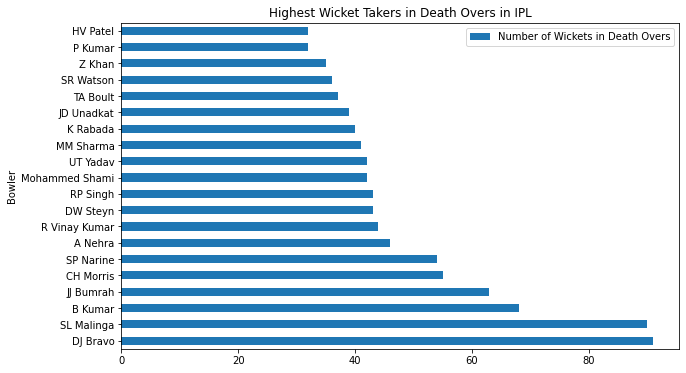

In [ ]:
df_bowlers_details.sort_values(by = 'Number of Wickets in Death Overs', ascending = False).head(20).plot(x = 'Bowler', y = 'Number of Wickets in Death Overs', kind = 'barh', figsize = (10,6), title = 'Highest Wicket Takers in Death Overs in IPL')
plt.show()

In [ ]:
df_bowlers_details_for_death_overs_economy_rate = df_bowlers_details.loc[df_bowlers_details['Balls Bowled in Death Overs'] >= 300]

In [ ]:
df_bowlers_details_for_death_overs_economy_rate.sort_values(by = 'Economy Rate in Death Overs').head(20)

,Bowler,Total Wickets taken,Total Balls Bowled,Total Runs Given,Total Extras Given,Total Bowling Average,Total Bowling Strike Rate,Number of Wickets in Powerplay,Balls Bowled in Powerplay,Runs Given in Powerplay,Extras given in Powerplay,Total Economy Rate,Economy Rate in Powerplay,Number of Wickets in Death Overs,Balls Bowled in Death Overs,Runs Given in Death Overs,Extras given in Death Overs,Economy Rate in Death Overs
92,SL Malinga,170,2974,3486,292,20.505882,17.494118,37.0,1164.0,1098.0,112.0,7.032952,5.659794,90,965,1252,113,7.784456
95,SP Narine,143,3174,3588,138,25.090909,22.195804,24.0,807.0,843.0,40.0,6.782609,6.267658,54,685,911,37,7.979562
12,CH Morris,96,1801,2377,157,24.760417,18.760417,22.0,717.0,821.0,79.0,7.918934,6.870293,55,609,862,50,8.492611
21,DW Steyn,97,2282,2583,177,26.628866,23.525773,34.0,1195.0,1131.0,98.0,6.791411,5.678661,43,559,792,42,8.500894
35,JJ Bumrah,133,2530,3107,185,23.360902,19.022556,26.0,830.0,857.0,61.0,7.368379,6.195181,63,965,1379,82,8.574093
78,RA Jadeja,127,3059,3862,114,30.409449,24.086614,6.0,135.0,182.0,4.0,7.575025,8.088889,24,332,475,19,8.584337
2,A Nehra,106,1974,2537,115,23.933962,18.622642,40.0,1131.0,1322.0,65.0,7.711246,7.013263,46,434,633,29,8.751152
109,Z Khan,102,2276,2860,169,28.039216,22.313725,52.0,1346.0,1388.0,104.0,7.539543,6.187221,35,547,810,41,8.884826
61,Mustafizur Rahman,38,887,1141,53,30.026316,23.342105,7.0,265.0,287.0,15.0,7.718151,6.498113,17,315,467,25,8.895238
85,S Kaul,58,1214,1729,66,29.810345,20.931034,12.0,348.0,498.0,19.0,8.545305,8.586207,25,352,525,20,8.948864


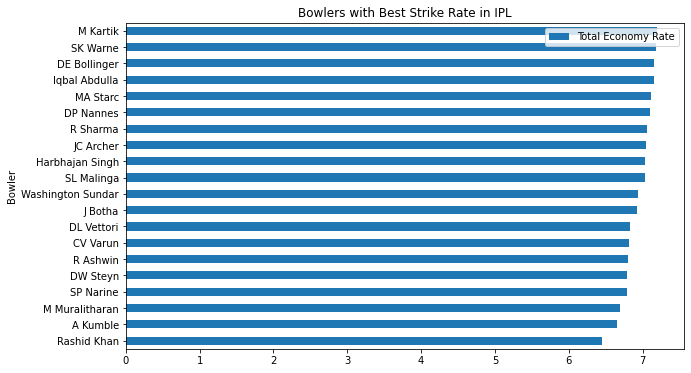

In [ ]:
df_bowlers_details.sort_values(by = 'Total Economy Rate').head(20).plot(x = 'Bowler', y = 'Total Economy Rate', kind = 'barh', figsize = (10,6), title = 'Bowlers with Best Strike Rate in IPL')
plt.show()

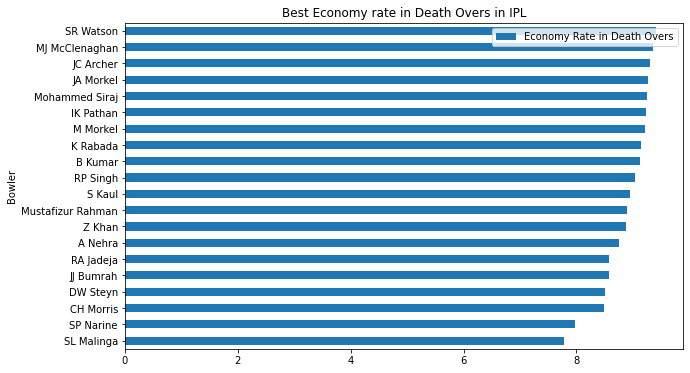

In [ ]:
df_bowlers_details_for_death_overs_economy_rate.sort_values(by = 'Economy Rate in Death Overs').head(20).plot(x = 'Bowler', y = 'Economy Rate in Death Overs', kind = 'barh', figsize = (10,6), title = 'Best Economy rate in Death Overs in IPL')
plt.show()

In [ ]:
# Team so far

# 01. KL Rahul (Perfect Anchor = Highest Average + Highest Balls per wicket)
# 02. Shikhar Dhawan (Boundary Hitter 1 = Highest number of Fours)
# 03. Virat Kohli (Boundary Hitter 2 = 2nd Highest with number of fours, 2nd highest with total number of runs in boundaries)
# 04. Jos Butler (Wicket keeper = Wicket Keeper batsmen with highest strike rate in IPL History, Scored almost 70% runs in Boundaries)
# 05. AB De Villier (Death Over Specialist 1 = Highest strike rate in Death Overs)
# 06. Andre Russel (Death Over Specialist 2 = Least number of balls per six, Highest strike rate in the History of IPL)
# 07. Hardik Pandya (Death Over Specialist 3 = 3rd Highest in terms of Least balls per six, 4th highest in terms of strike rate)
# 08. Ravindra Jadeja (Spinner 1 = Indian Spinner with best economy rate in death overs, Very Healthy Batting strike rate)
# 09. Rashid Khan (Spinner 2 = Bowler with the best Economy Rate in IPL History)
# 10. Bhuvaneshwar Kumar (Fast bowler 1 = Indian Bowler with best economy rate in Powerplay overs + Highest number of wickets in Powerplay)
# 11. Jasprit Bumrah (Fast bowler 2 = Indian Bowler with the best combination of highest wickets in death + best economy rate in death)

In [ ]:
#Project Completed